# Investigating brain dopamine lateralization in Parkinson’s Disease

Prepared by:

Alda Kola -> Student ID: 2071530

Beliz Günay -> Student ID: 2080284

Arda Ertanhan -> Student ID: 2071519

**Importing the necessary libraries and uploading the files to the colab environment**

In [1]:
# Import necessary libraries
import pandas as pd
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency, ttest_ind, pearsonr, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# File paths
patient_master_path = '/content/drive/MyDrive/PM_project/Data-20240506/Patient_Master.csv'
data_dictionary_path = '/content/drive/MyDrive/PM_project/Data-20240506/PPMI_data_dictionary_merge.csv'

# Load data
patient_master_df = pd.read_csv(patient_master_path)
data_dictionary_df = pd.read_csv(data_dictionary_path)

# Display the first few rows of the loaded dataframes to verify
print("Patient Master Data:")
print(patient_master_df.head())

print("\nData Dictionary:")
print(data_dictionary_df.head())

Patient Master Data:
   Unnamed: 0  PATNO COHORT  ENROLL_AGE GENETICS  BIRTHDT ETHNICITY     SEX  \
0           1   3000     HC        69.1      NaN  12/1941     WHITE  Female   
1           2   3006     PD        57.5      NaN  10/1953     WHITE  Female   
2           3   3008     HC        81.9      NaN  07/1929     WHITE  Female   
3           4   3009     HC        83.7      NaN  10/1927     BLACK  Female   
4           5   3011     HC        31.9      NaN  08/1979     WHITE    Male   

  HANDED EVENT_ID  ...  AV133_TOTAL_DOSE_CALC  AV133_SCANNER  \
0  Right       SC  ...                    NaN            NaN   
1  Right       SC  ...                    NaN            NaN   
2  Right       SC  ...                    NaN            NaN   
3  Right       SC  ...                    NaN            NaN   
4  Right       SC  ...                    NaN            NaN   

  AV133_EMISS_SCAN_START_TIME AV133_SCAN_QUALITY_RATING   HTCM  WGTKG  \
0                         NaN                 

#PART 1 – Dopamine Brain Lateralisation in Healthy Controls

**Is dopamine function lateralised in healthy subjects? Is there any relevant
covariate associated to dopamine function lateralisation?**

**Preprocessing of data.**

a) Selecting healthy cohorts.

b) Handling missing data.

c) Transforming categorical data.

In [4]:
# Identify healthy subjects (HC cohort)
healthy_subjects_df = patient_master_df[patient_master_df['COHORT'] == 'HC']

# Select relevant features for dopamine function and covariates
dopamine_features = ['DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L']
covariates = ['ENROLL_AGE', 'SEX', 'HANDED', 'EDUCYRS', 'WGTKG', 'ETHNICITY', 'HTCM', 'MCATOT']

# Filter the dataset to include only the selected features and covariates
filtered_df = healthy_subjects_df[dopamine_features + covariates]

# Check for NaN values in the filtered data
nan_counts = filtered_df.isna().sum()
print("NaN counts before dropping:", nan_counts)

# Drop rows with NaN values in any of the covariates
filtered_df = filtered_df.dropna(subset=covariates)

# Check for NaN values after dropping
nan_counts_after = filtered_df.isna().sum()
print("NaN counts after dropping:", nan_counts_after)

# Impute missing values for numerical columns using SimpleImputer if any remain
if filtered_df[['ENROLL_AGE', 'EDUCYRS', 'WGTKG', 'HTCM', 'MCATOT']].isna().sum().sum() > 0:
    imputer = SimpleImputer(strategy='mean')
    filtered_df[['ENROLL_AGE', 'EDUCYRS', 'WGTKG', 'HTCM', 'MCATOT']] = imputer.fit_transform(filtered_df[['ENROLL_AGE', 'EDUCYRS', 'WGTKG', 'HTCM', 'MCATOT']])

# Convert categorical variables to numeric values
filtered_df['SEX'] = filtered_df['SEX'].map({'Male': 0, 'Female': 1})
filtered_df['HANDED'] = filtered_df['HANDED'].map({'Right': 0, 'Left': 1, 'Mixed': 2})
filtered_df['ETHNICITY'] = filtered_df['ETHNICITY'].map({
    'ASIAN': 0,
    'BLACK': 1,
    'HAWOPI': 2,
    'INDALS': 3,
    'UNKNOWN': 4,
    'WHITE': 5,
    'NOTSPECIFIED': 6
})

# Display the first few rows of the filtered data
print("Filtered Data:")
print(filtered_df.head())

NaN counts before dropping: DATSCAN_CAUDATE_R     0
DATSCAN_CAUDATE_L     0
DATSCAN_PUTAMEN_R     0
DATSCAN_PUTAMEN_L     0
ENROLL_AGE           33
SEX                   0
HANDED                0
EDUCYRS               3
WGTKG                34
ETHNICITY             0
HTCM                 34
MCATOT                2
dtype: int64
NaN counts after dropping: DATSCAN_CAUDATE_R    0
DATSCAN_CAUDATE_L    0
DATSCAN_PUTAMEN_R    0
DATSCAN_PUTAMEN_L    0
ENROLL_AGE           0
SEX                  0
HANDED               0
EDUCYRS              0
WGTKG                0
ETHNICITY            0
HTCM                 0
MCATOT               0
dtype: int64
Filtered Data:
   DATSCAN_CAUDATE_R  DATSCAN_CAUDATE_L  DATSCAN_PUTAMEN_R  DATSCAN_PUTAMEN_L  \
0               2.99               3.43               2.94               2.63   
2               3.99               3.46               2.07               2.12   
3               2.95               2.87               1.78               1.91   
4               

**a) Visualizing dopamine function lateralization using box plots**

**b) Correlation matrix to identify relationships between dopamine function and covariates**

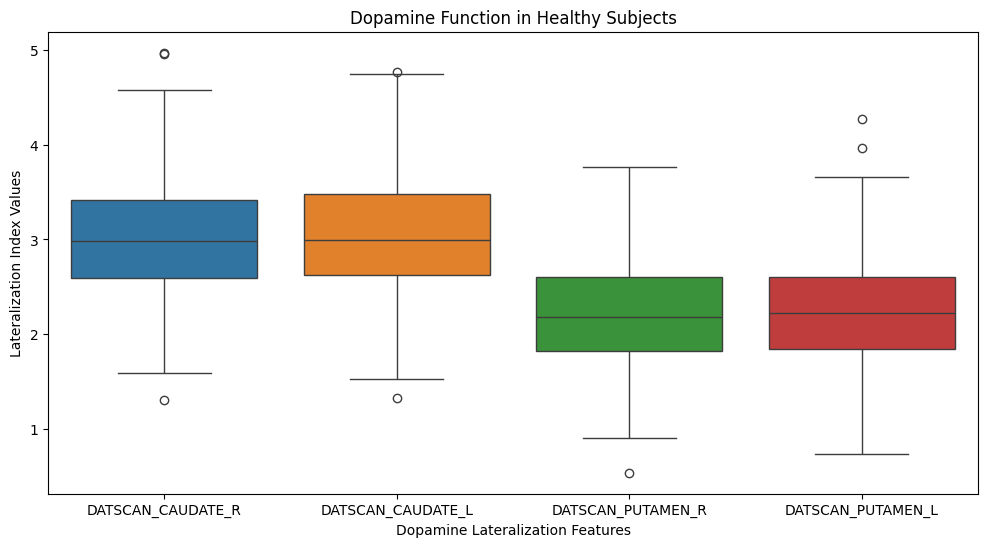

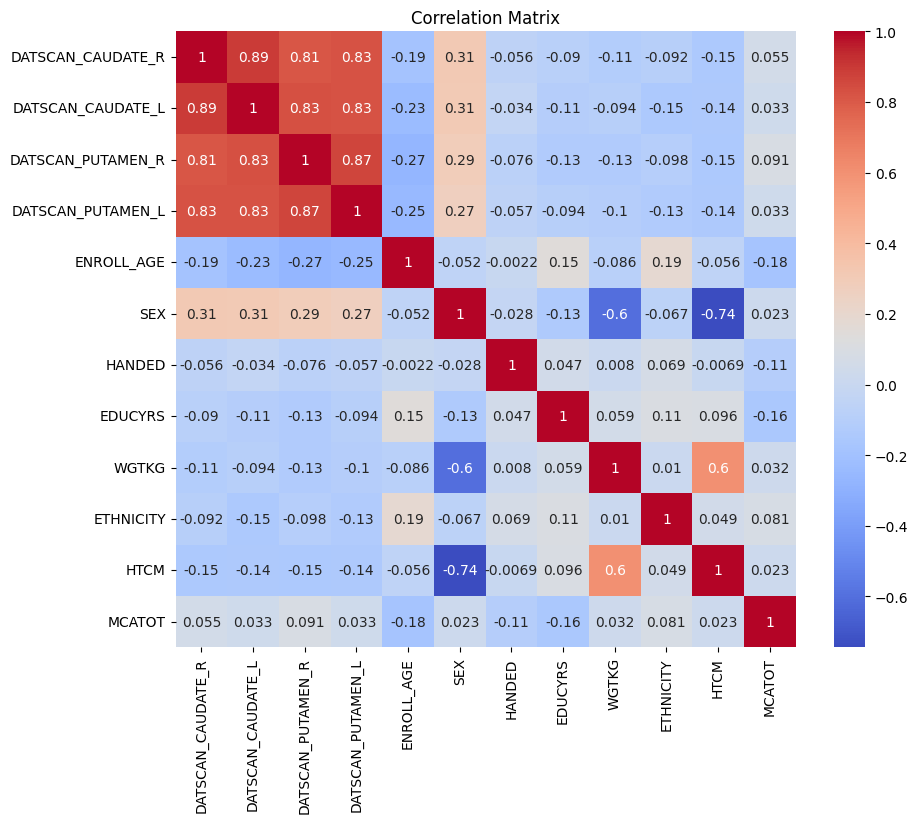

                   DATSCAN_CAUDATE_R  DATSCAN_CAUDATE_L  DATSCAN_PUTAMEN_R  \
DATSCAN_CAUDATE_R           1.000000           0.893358           0.814363   
DATSCAN_CAUDATE_L           0.893358           1.000000           0.830761   
DATSCAN_PUTAMEN_R           0.814363           0.830761           1.000000   
DATSCAN_PUTAMEN_L           0.828451           0.826757           0.868862   
ENROLL_AGE                 -0.187264          -0.233967          -0.273818   
SEX                         0.312960           0.309867           0.290016   
HANDED                     -0.056257          -0.034490          -0.076246   
EDUCYRS                    -0.090190          -0.106360          -0.128254   
WGTKG                      -0.112993          -0.094419          -0.126996   
ETHNICITY                  -0.092363          -0.150404          -0.097550   
HTCM                       -0.147802          -0.140208          -0.147288   
MCATOT                      0.055044           0.032524         

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df[dopamine_features])
plt.title('Dopamine Function in Healthy Subjects')
plt.xlabel('Dopamine Lateralization Features')
plt.ylabel('Lateralization Index Values')
plt.show()

correlation_matrix = filtered_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print(correlation_matrix)

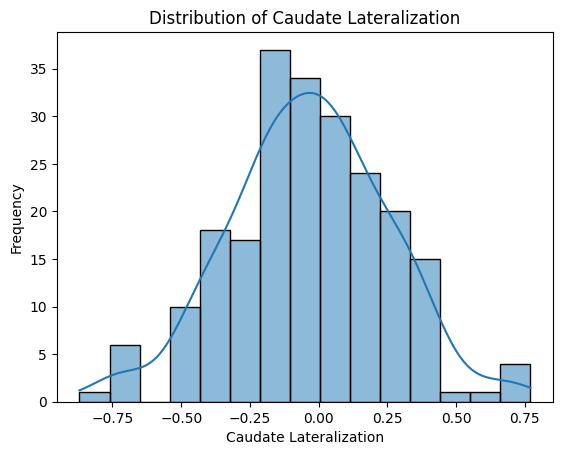

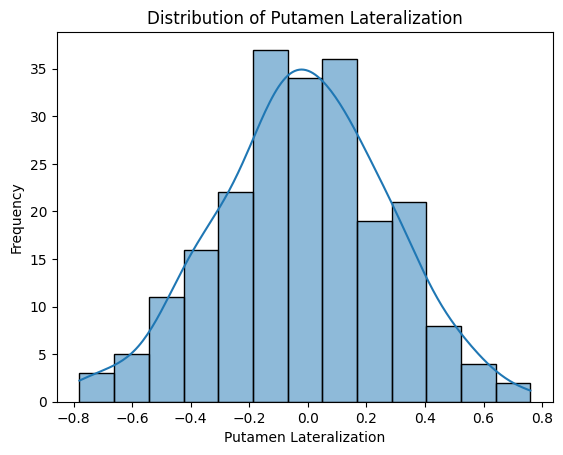

In [6]:
# Add dopamine lateralization measures
filtered_df['CAUDATE_LATERALIZATION'] = filtered_df['DATSCAN_CAUDATE_R'] - filtered_df['DATSCAN_CAUDATE_L']
filtered_df['PUTAMEN_LATERALIZATION'] = filtered_df['DATSCAN_PUTAMEN_R'] - filtered_df['DATSCAN_PUTAMEN_L']

# Visualize the distribution of dopamine lateralization measures
sns.histplot(filtered_df['CAUDATE_LATERALIZATION'], kde=True)
plt.title('Distribution of Caudate Lateralization')
plt.xlabel('Caudate Lateralization')
plt.ylabel('Frequency')
plt.show()

sns.histplot(filtered_df['PUTAMEN_LATERALIZATION'], kde=True)
plt.title('Distribution of Putamen Lateralization')
plt.xlabel('Putamen Lateralization')
plt.ylabel('Frequency')
plt.show()

**Further comparison and visualization of dopamine lateralization and covarities**

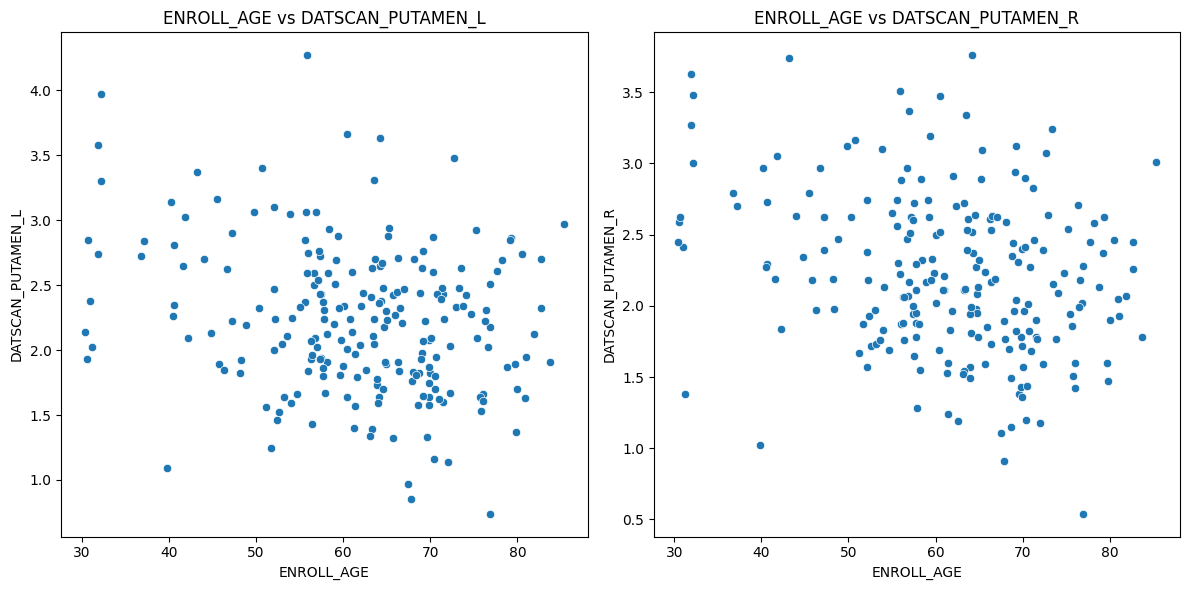

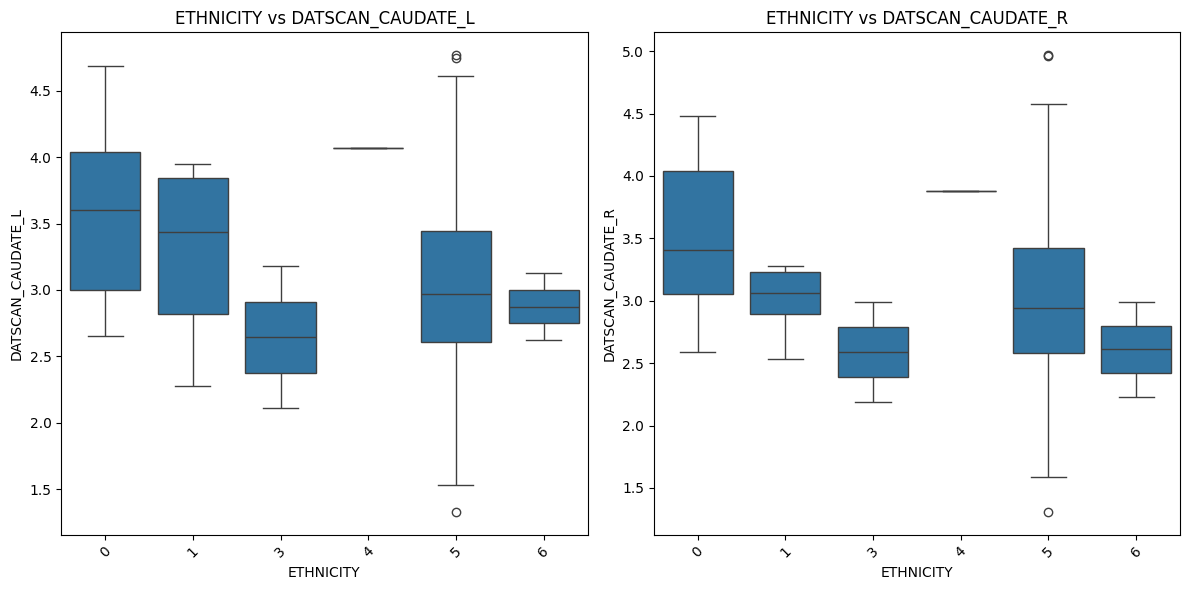

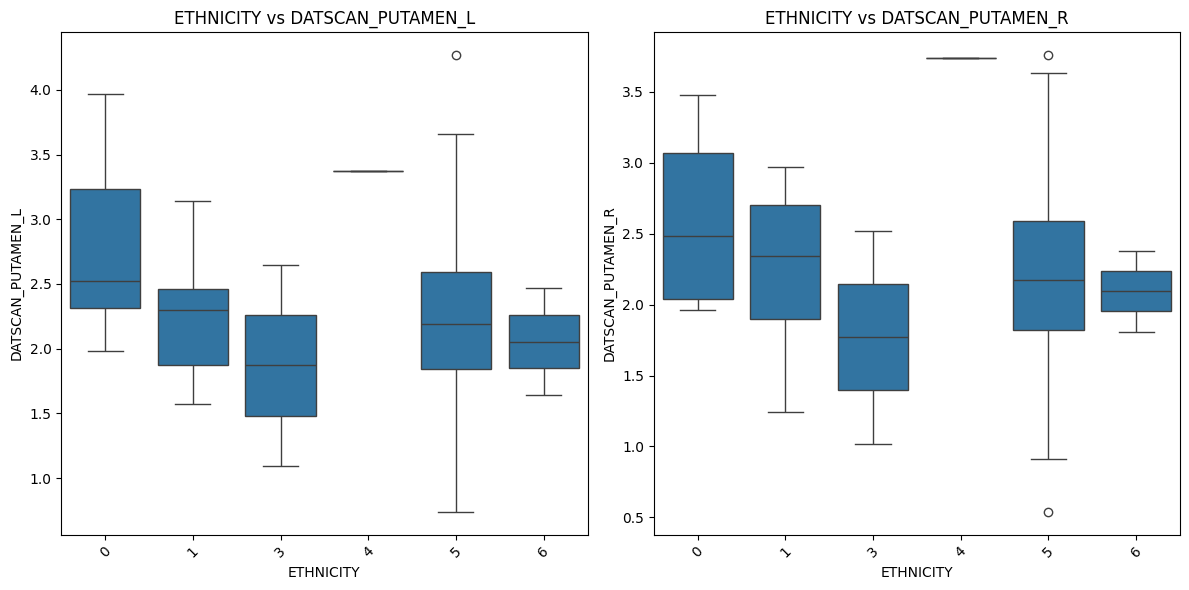

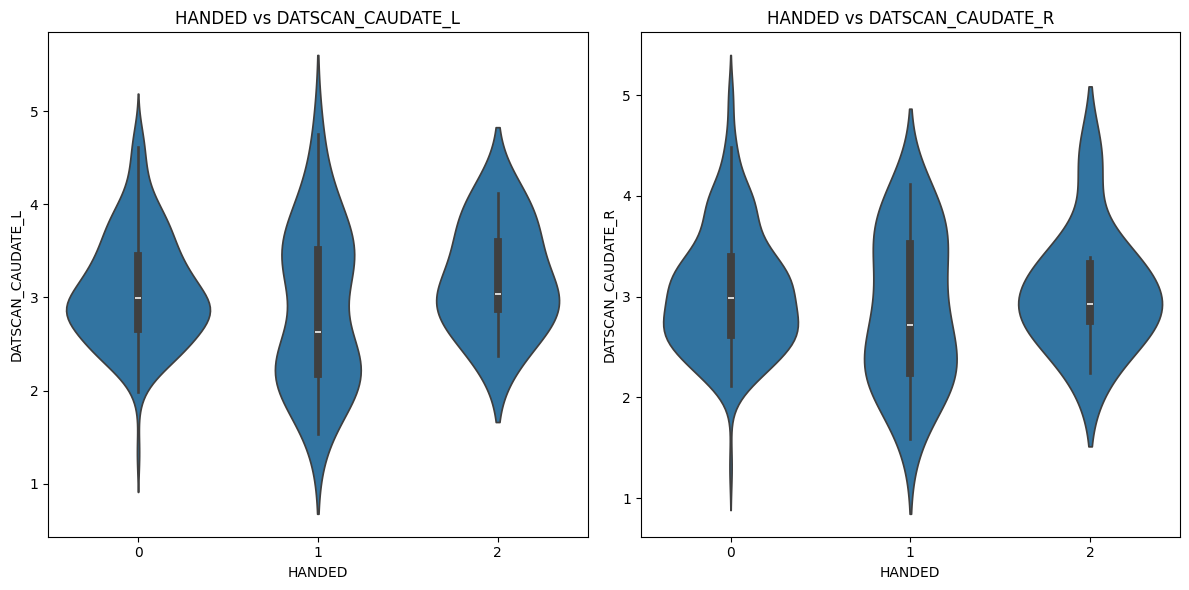

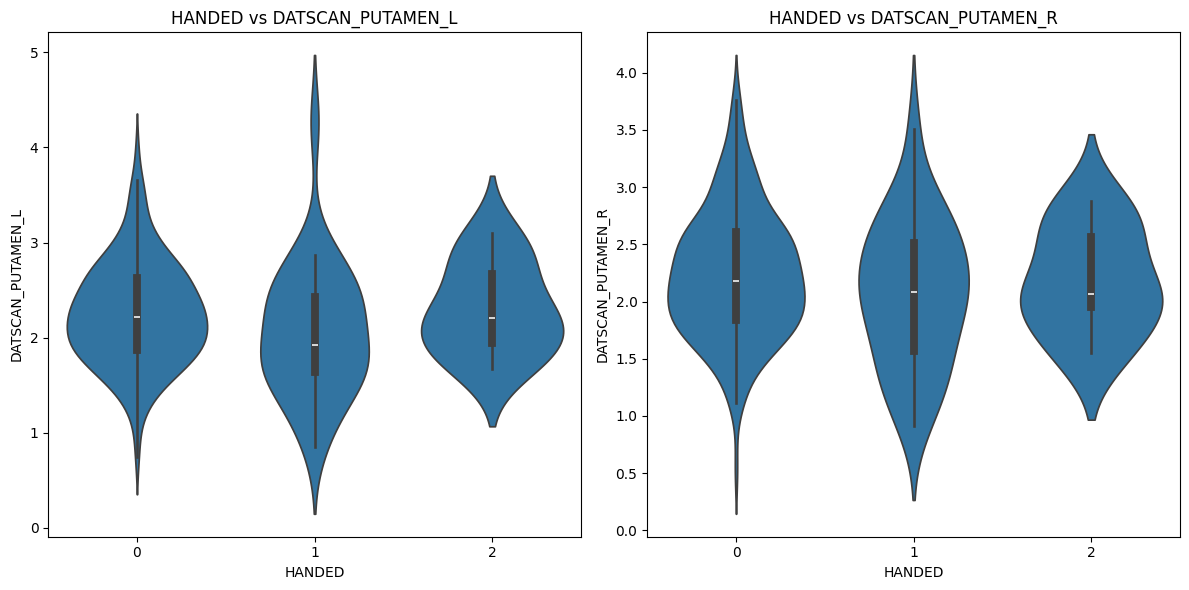

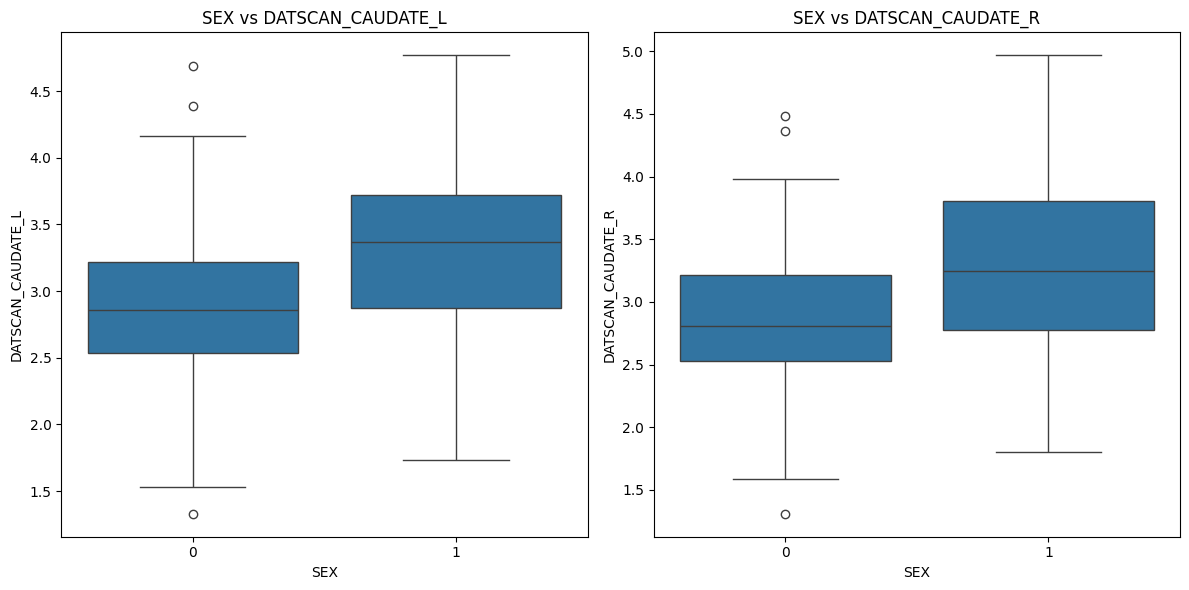

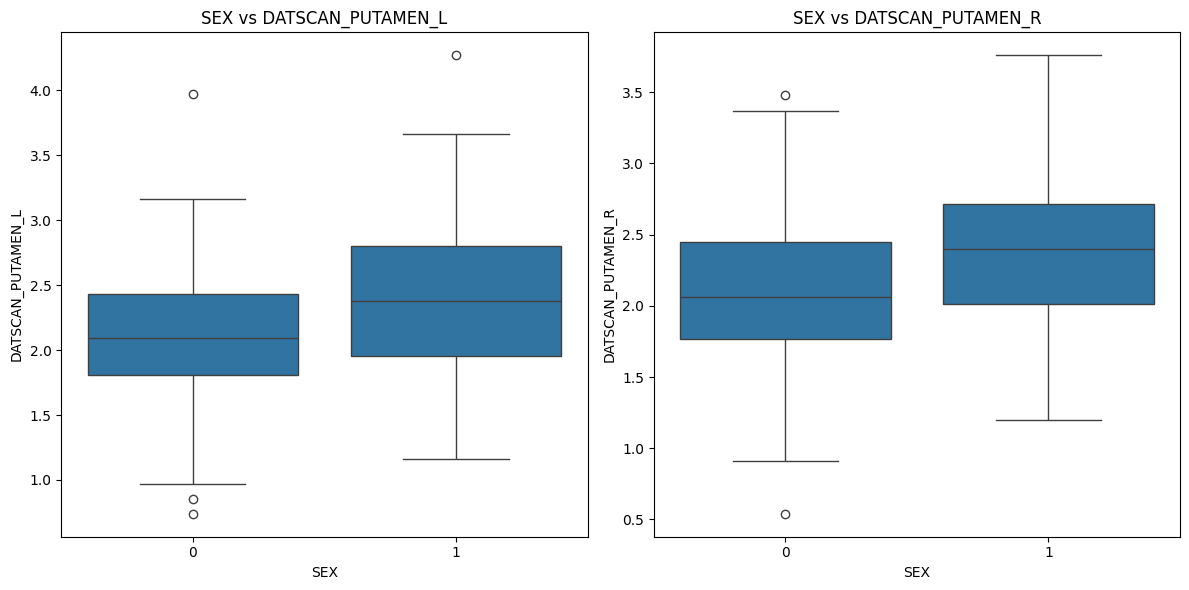

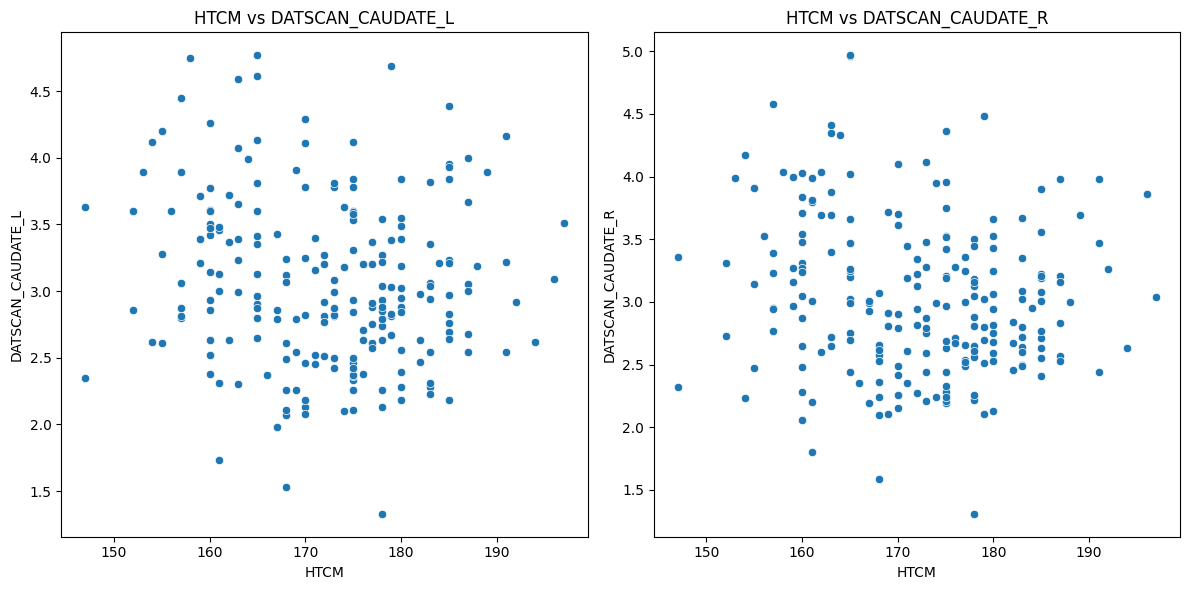

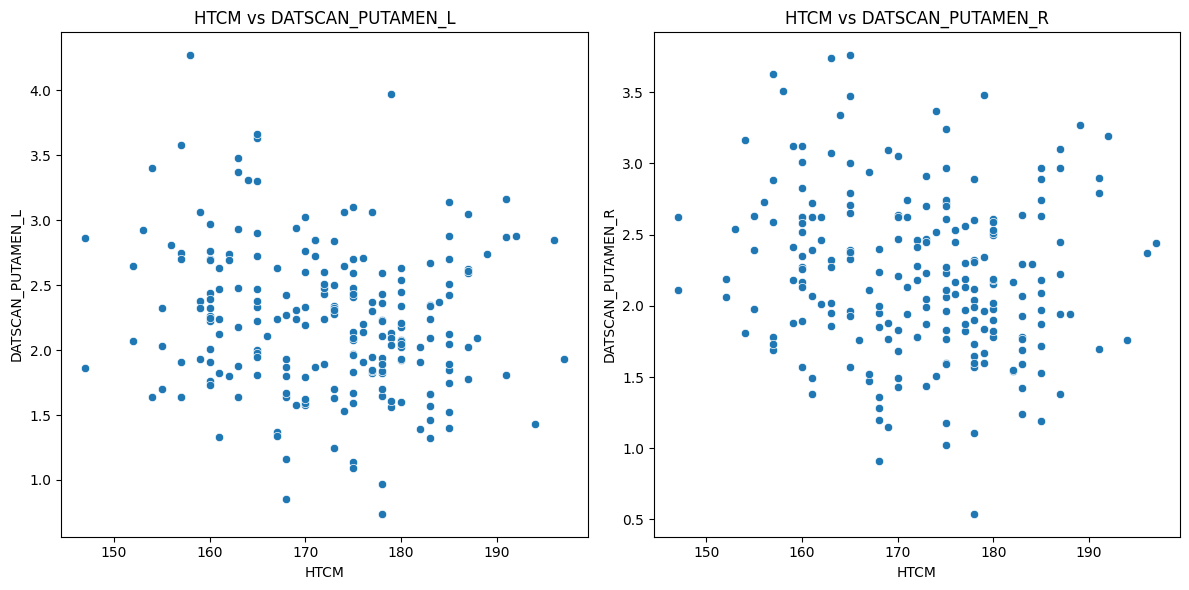

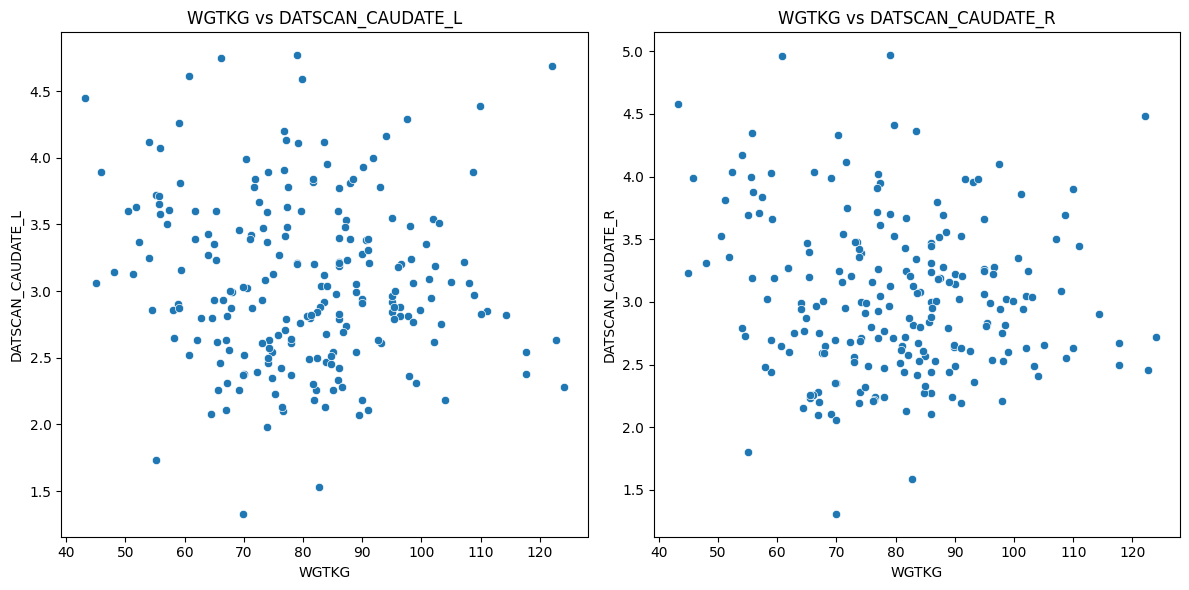

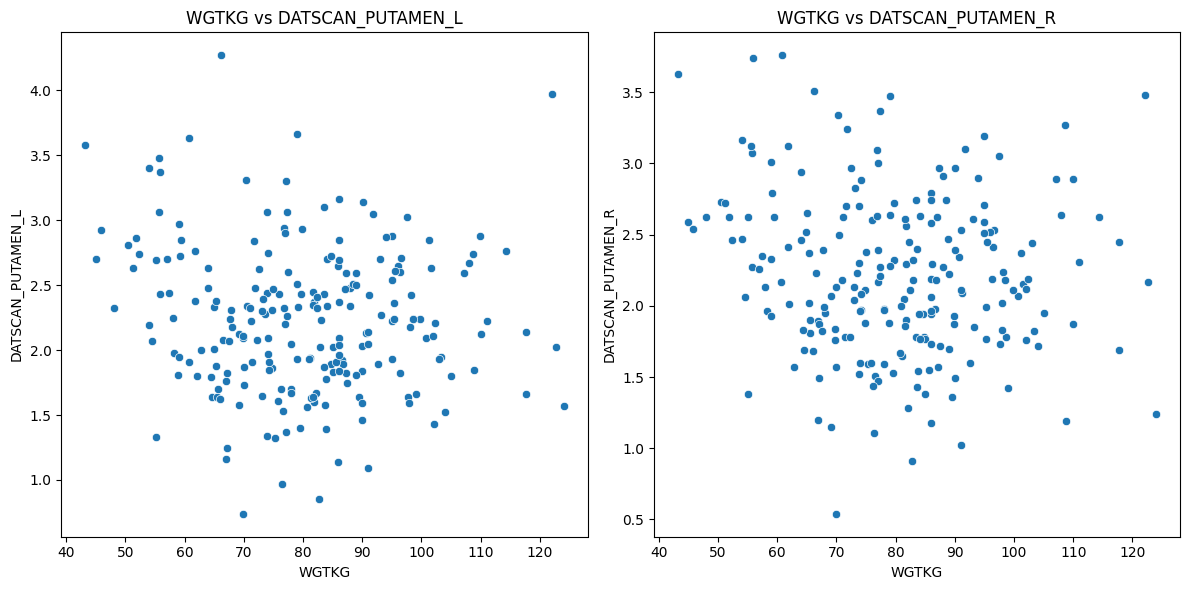

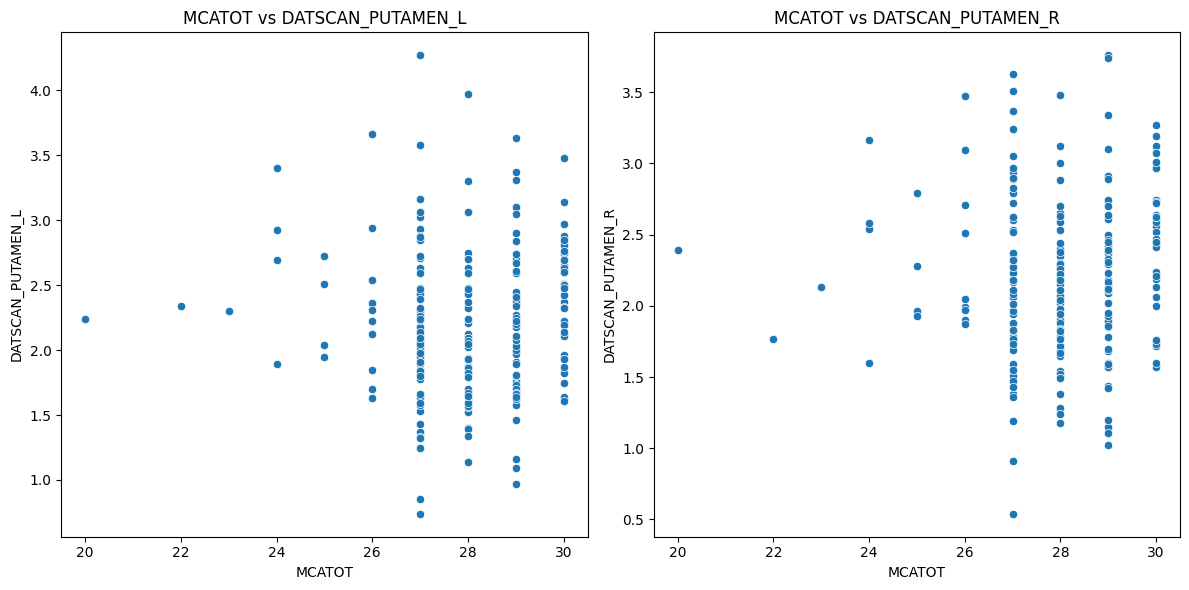

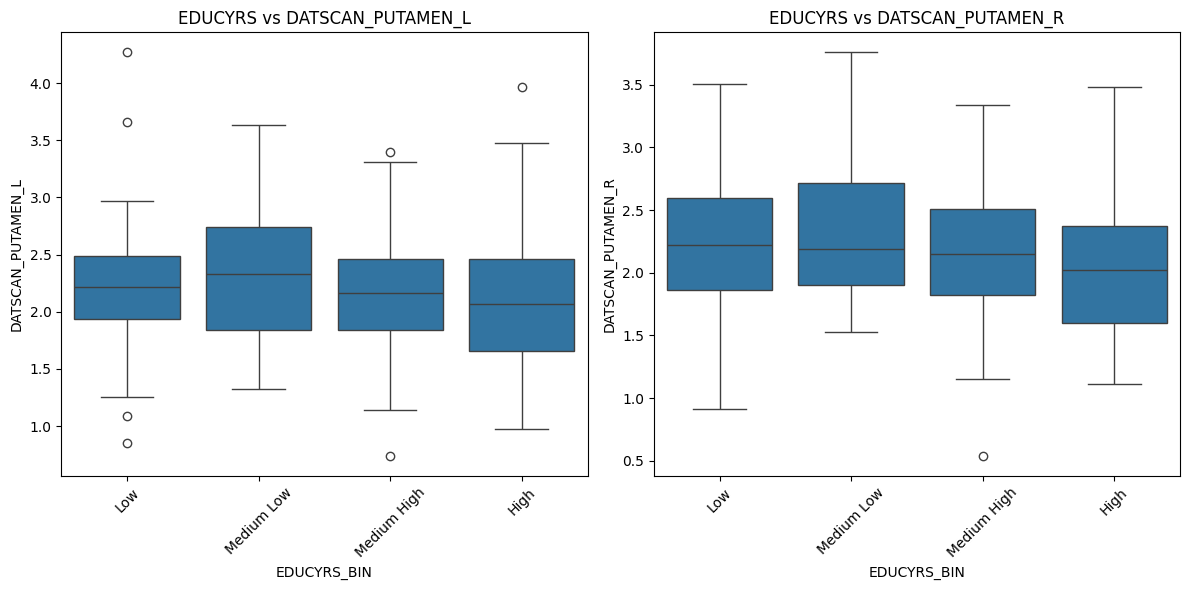

In [7]:
# Visualize the relationships between dopamine lateralization and covariates
# Relationship between ENROLL_AGE and DATSCAN_PUTAMEN_L/R
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='ENROLL_AGE', y='DATSCAN_PUTAMEN_L', data=filtered_df)
plt.title('ENROLL_AGE vs DATSCAN_PUTAMEN_L')

plt.subplot(1, 2, 2)
sns.scatterplot(x='ENROLL_AGE', y='DATSCAN_PUTAMEN_R', data=filtered_df)
plt.title('ENROLL_AGE vs DATSCAN_PUTAMEN_R')

plt.tight_layout()
plt.show()

# Visualize the relationships between ETHNICITY and DATSCAN_CAUDATE_L/R
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='ETHNICITY', y='DATSCAN_CAUDATE_L', data=filtered_df)
plt.title('ETHNICITY vs DATSCAN_CAUDATE_L')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='ETHNICITY', y='DATSCAN_CAUDATE_R', data=filtered_df)
plt.title('ETHNICITY vs DATSCAN_CAUDATE_R')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Visualize the relationships between ETHNICITY and DATSCAN_PUTAMEN_L/R
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='ETHNICITY', y='DATSCAN_PUTAMEN_L', data=filtered_df)
plt.title('ETHNICITY vs DATSCAN_PUTAMEN_L')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='ETHNICITY', y='DATSCAN_PUTAMEN_R', data=filtered_df)
plt.title('ETHNICITY vs DATSCAN_PUTAMEN_R')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Visualize the relationships between HANDED and DATSCAN_CAUDATE_L/R
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='HANDED', y='DATSCAN_CAUDATE_L', data=filtered_df)
plt.title('HANDED vs DATSCAN_CAUDATE_L')

plt.subplot(1, 2, 2)
sns.violinplot(x='HANDED', y='DATSCAN_CAUDATE_R', data=filtered_df)
plt.title('HANDED vs DATSCAN_CAUDATE_R')

plt.tight_layout()
plt.show()

# Visualize the relationships between HANDED and DATSCAN_PUTAMEN_L/R
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='HANDED', y='DATSCAN_PUTAMEN_L', data=filtered_df)
plt.title('HANDED vs DATSCAN_PUTAMEN_L')

plt.subplot(1, 2, 2)
sns.violinplot(x='HANDED', y='DATSCAN_PUTAMEN_R', data=filtered_df)
plt.title('HANDED vs DATSCAN_PUTAMEN_R')

plt.tight_layout()
plt.show()

# Visualize the relationships between SEX and DATSCAN_CAUDATE_L/R
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='SEX', y='DATSCAN_CAUDATE_L', data=filtered_df)
plt.title('SEX vs DATSCAN_CAUDATE_L')

plt.subplot(1, 2, 2)
sns.boxplot(x='SEX', y='DATSCAN_CAUDATE_R', data=filtered_df)
plt.title('SEX vs DATSCAN_CAUDATE_R')

plt.tight_layout()
plt.show()

# Visualize the relationships between SEX and DATSCAN_PUTAMEN_L/R
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='SEX', y='DATSCAN_PUTAMEN_L', data=filtered_df)
plt.title('SEX vs DATSCAN_PUTAMEN_L')

plt.subplot(1, 2, 2)
sns.boxplot(x='SEX', y='DATSCAN_PUTAMEN_R', data=filtered_df)
plt.title('SEX vs DATSCAN_PUTAMEN_R')

plt.tight_layout()
plt.show()

# Visualize the relationships between HTCM and DATSCAN_CAUDATE_L/R
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='HTCM', y='DATSCAN_CAUDATE_L', data=filtered_df)
plt.title('HTCM vs DATSCAN_CAUDATE_L')

plt.subplot(1, 2, 2)
sns.scatterplot(x='HTCM', y='DATSCAN_CAUDATE_R', data=filtered_df)
plt.title('HTCM vs DATSCAN_CAUDATE_R')

plt.tight_layout()
plt.show()

# Visualize the relationships between HTCM and DATSCAN_PUTAMEN_L/R
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='HTCM', y='DATSCAN_PUTAMEN_L', data=filtered_df)
plt.title('HTCM vs DATSCAN_PUTAMEN_L')

plt.subplot(1, 2, 2)
sns.scatterplot(x='HTCM', y='DATSCAN_PUTAMEN_R', data=filtered_df)
plt.title('HTCM vs DATSCAN_PUTAMEN_R')

plt.tight_layout()
plt.show()

# Visualize the relationships between WGTKG and DATSCAN_CAUDATE_L/R
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='WGTKG', y='DATSCAN_CAUDATE_L', data=filtered_df)
plt.title('WGTKG vs DATSCAN_CAUDATE_L')

plt.subplot(1, 2, 2)
sns.scatterplot(x='WGTKG', y='DATSCAN_CAUDATE_R', data=filtered_df)
plt.title('WGTKG vs DATSCAN_CAUDATE_R')

plt.tight_layout()
plt.show()

# Visualize the relationships between WGTKG and DATSCAN_PUTAMEN_L/R
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='WGTKG', y='DATSCAN_PUTAMEN_L', data=filtered_df)
plt.title('WGTKG vs DATSCAN_PUTAMEN_L')

plt.subplot(1, 2, 2)
sns.scatterplot(x='WGTKG', y='DATSCAN_PUTAMEN_R', data=filtered_df)
plt.title('WGTKG vs DATSCAN_PUTAMEN_R')

plt.tight_layout()
plt.show()

# Visualize the relationships between MCATOT and DATSCAN_PUTAMEN_L/R
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='MCATOT', y='DATSCAN_PUTAMEN_L', data=filtered_df)
plt.title('MCATOT vs DATSCAN_PUTAMEN_L')

plt.subplot(1, 2, 2)
sns.scatterplot(x='MCATOT', y='DATSCAN_PUTAMEN_R', data=filtered_df)
plt.title('MCATOT vs DATSCAN_PUTAMEN_R')

plt.tight_layout()
plt.show()

# Bin the EDUCATION Years for better visualization in box plots
filtered_df['EDUCYRS_BIN'] = pd.qcut(filtered_df['EDUCYRS'], 4, labels=['Low', 'Medium Low', 'Medium High', 'High'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='EDUCYRS_BIN', y='DATSCAN_PUTAMEN_L', data=filtered_df)
plt.title('EDUCYRS vs DATSCAN_PUTAMEN_L')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='EDUCYRS_BIN', y='DATSCAN_PUTAMEN_R', data=filtered_df)
plt.title('EDUCYRS vs DATSCAN_PUTAMEN_R')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Applying ANOVA and Regression to identified and preprocessed covariates to find dopamine lateralization link**

In [8]:
# Add dopamine lateralization measures
filtered_df['CAUDATE_LATERALIZATION'] = filtered_df['DATSCAN_CAUDATE_R'] - filtered_df['DATSCAN_CAUDATE_L']
filtered_df['PUTAMEN_LATERALIZATION'] = filtered_df['DATSCAN_PUTAMEN_R'] - filtered_df['DATSCAN_PUTAMEN_L']

# ANOVA: Assess impact of categorical covariates on dopamine lateralization
anova_results = {}
for feature in ['CAUDATE_LATERALIZATION', 'PUTAMEN_LATERALIZATION']:
    model = ols(f'{feature} ~ C(SEX) + C(HANDED) + C(ETHNICITY)', data=filtered_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[feature] = anova_table

print('ANOVA Results for Caudate Lateralization:')
print(anova_results['CAUDATE_LATERALIZATION'])

print('ANOVA Results for Putamen Lateralization:')
print(anova_results['PUTAMEN_LATERALIZATION'])

# Pearson Correlation: Evaluate relationship between continuous covariates and dopamine lateralization
caudate_corr = filtered_df[['CAUDATE_LATERALIZATION', 'ENROLL_AGE', 'EDUCYRS', 'WGTKG', 'HTCM', 'MCATOT']].corr()
putamen_corr = filtered_df[['PUTAMEN_LATERALIZATION', 'ENROLL_AGE', 'EDUCYRS', 'WGTKG', 'HTCM', 'MCATOT']].corr()

print('Pearson Correlation for Caudate Lateralization:')
print(caudate_corr)

print('Pearson Correlation for Putamen Lateralization:')
print(putamen_corr)

# Linear Regression: Predict lateralization indices
# Separate features and target variable for Caudate Lateralization
X_caudate = filtered_df[['ENROLL_AGE', 'EDUCYRS', 'WGTKG', 'HTCM', 'MCATOT']]
y_caudate = filtered_df['CAUDATE_LATERALIZATION']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_caudate, y_caudate, test_size=0.3, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Linear Regression for Caudate Lateralization:')
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Repeat the same process for Putamen Lateralization
X_putamen = filtered_df[['ENROLL_AGE', 'EDUCYRS', 'WGTKG', 'HTCM', 'MCATOT']]
y_putamen = filtered_df['PUTAMEN_LATERALIZATION']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_putamen, y_putamen, test_size=0.3, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Linear Regression for Putamen Lateralization:')
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

ANOVA Results for Caudate Lateralization:
                 sum_sq     df         F    PR(>F)
C(SEX)         0.007030    1.0  0.085665  0.770052
C(HANDED)      0.167962    2.0  1.023365  0.361177
C(ETHNICITY)   0.722432    5.0  1.760662  0.122332
Residual      17.151305  209.0       NaN       NaN
ANOVA Results for Putamen Lateralization:
                 sum_sq     df         F    PR(>F)
C(SEX)         0.037701    1.0  0.447154  0.504427
C(HANDED)      0.123192    2.0  0.730571  0.482860
C(ETHNICITY)   0.358324    5.0  0.849993  0.515767
Residual      17.621251  209.0       NaN       NaN
Pearson Correlation for Caudate Lateralization:
                        CAUDATE_LATERALIZATION  ENROLL_AGE   EDUCYRS  \
CAUDATE_LATERALIZATION                1.000000    0.106841  0.037685   
ENROLL_AGE                            0.106841    1.000000  0.146034   
EDUCYRS                               0.037685    0.146034  1.000000   
WGTKG                                -0.037373   -0.085985  0.058755  

In [9]:
# Adding interaction terms for ANOVA
anova_model_caudate = smf.ols('CAUDATE_LATERALIZATION ~ C(SEX) * ENROLL_AGE + C(HANDED) * EDUCYRS', data=filtered_df).fit()
anova_results_caudate = sm.stats.anova_lm(anova_model_caudate, typ=2)
print("ANOVA Results for Caudate Lateralization with interaction terms:")
print(anova_results_caudate)

anova_model_putamen = smf.ols('PUTAMEN_LATERALIZATION ~ C(SEX) * ENROLL_AGE + C(HANDED) * EDUCYRS', data=filtered_df).fit()
anova_results_putamen = sm.stats.anova_lm(anova_model_putamen, typ=2)
print("ANOVA Results for Putamen Lateralization with interaction terms:")
print(anova_results_putamen)

# Adding interaction terms for Linear Regression
# Prepare the data with interaction terms
filtered_df['SEX_ENROLL_AGE'] = filtered_df['SEX'] * filtered_df['ENROLL_AGE']
filtered_df['HANDED_EDUCYRS'] = filtered_df['HANDED'] * filtered_df['EDUCYRS']

# Define the features and target variables for Caudate Lateralization
X_caudate = filtered_df[['ENROLL_AGE', 'EDUCYRS', 'SEX_ENROLL_AGE', 'HANDED_EDUCYRS', 'HTCM', 'MCATOT']]
y_caudate = filtered_df['CAUDATE_LATERALIZATION']

# Fit the linear regression model for caudate
linear_regression_caudate = LinearRegression().fit(X_caudate, y_caudate)
y_pred_caudate = linear_regression_caudate.predict(X_caudate)
mse_caudate = mean_squared_error(y_caudate, y_pred_caudate)
r2_caudate = linear_regression_caudate.score(X_caudate, y_caudate)
print("Linear Regression for Caudate Lateralization with interaction terms:")
print(f"Mean Squared Error: {mse_caudate}")
print(f"R^2 Score: {r2_caudate}")

# Define the features and target variables for Putamen Lateralization
X_putamen = filtered_df[['ENROLL_AGE', 'EDUCYRS', 'SEX_ENROLL_AGE', 'HANDED_EDUCYRS', 'HTCM', 'MCATOT']]
y_putamen = filtered_df['PUTAMEN_LATERALIZATION']

# Fit the linear regression model for putamen
linear_regression_putamen = LinearRegression().fit(X_putamen, y_putamen)
y_pred_putamen = linear_regression_putamen.predict(X_putamen)
mse_putamen = mean_squared_error(y_putamen, y_pred_putamen)
r2_putamen = linear_regression_putamen.score(X_putamen, y_putamen)
print("Linear Regression for Putamen Lateralization with interaction terms:")
print(f"Mean Squared Error: {mse_putamen}")
print(f"R^2 Score: {r2_putamen}")

ANOVA Results for Caudate Lateralization with interaction terms:
                      sum_sq     df         F    PR(>F)
C(SEX)              0.000845    1.0  0.010402  0.918862
C(HANDED)           0.154682    2.0  0.952067  0.387610
ENROLL_AGE          0.278336    1.0  3.426310  0.065576
C(SEX):ENROLL_AGE   0.015236    1.0  0.187559  0.665402
EDUCYRS             0.017234    1.0  0.212150  0.645566
C(HANDED):EDUCYRS   0.635427    2.0  3.911047  0.021501
Residual           16.978087  209.0       NaN       NaN
ANOVA Results for Putamen Lateralization with interaction terms:
                      sum_sq     df         F    PR(>F)
C(SEX)              0.011647    1.0  0.139549  0.709109
C(HANDED)           0.113800    2.0  0.681728  0.506863
ENROLL_AGE          0.029140    1.0  0.349131  0.555244
C(SEX):ENROLL_AGE   0.100916    1.0  1.209082  0.272779
EDUCYRS             0.029009    1.0  0.347554  0.556138
C(HANDED):EDUCYRS   0.337834    2.0  2.023815  0.134732
Residual           17.444132  

**Application of the Chi-square method to observe the relationship between categorical variables and dopamine lateralization in the caudate and putamen areas**

In [10]:
# Binarize continuous variables for Chi-square test
filtered_df['MCATOT_BIN'] = pd.qcut(filtered_df['MCATOT'], 2, labels=['Low', 'High'])
filtered_df['EDUCYRS_BIN'] = pd.qcut(filtered_df['EDUCYRS'], 2, labels=['Low', 'High'])
filtered_df['HTCM_BIN'] = pd.qcut(filtered_df['HTCM'], 2, labels=['Low', 'High'])
filtered_df['WGTKG_BIN'] = pd.qcut(filtered_df['WGTKG'], 2, labels=['Low', 'High'])
filtered_df['ENROLL_AGE_BIN'] = pd.qcut(filtered_df['ENROLL_AGE'], 2, labels=['Young', 'Old'])

# Function to perform Chi-square test
def chi_square_test(covariate):
    contingency_table_putamen = pd.crosstab(filtered_df[covariate], filtered_df['PUTAMEN_LATERALIZATION'])
    contingency_table_caudate = pd.crosstab(filtered_df[covariate], filtered_df['CAUDATE_LATERALIZATION'])

    chi2_putamen, p_putamen, _, _ = chi2_contingency(contingency_table_putamen)
    chi2_caudate, p_caudate, _, _ = chi2_contingency(contingency_table_caudate)

    print(f"\nChi-square test for {covariate} and PUTAMEN_LATERALIZATION:")
    print(f"Chi2 Statistic: {chi2_putamen}, p-value: {p_putamen}")

    print(f"\nChi-square test for {covariate} and CAUDATE_LATERALIZATION:")
    print(f"Chi2 Statistic: {chi2_caudate}, p-value: {p_caudate}")

# Perform Chi-square test for each covariate
covariates = ['ENROLL_AGE_BIN', 'ETHNICITY', 'HANDED', 'SEX', 'MCATOT_BIN', 'EDUCYRS_BIN', 'HTCM_BIN', 'WGTKG_BIN']
for covariate in covariates:
    chi_square_test(covariate)



Chi-square test for ENROLL_AGE_BIN and PUTAMEN_LATERALIZATION:
Chi2 Statistic: 147.3273849607183, p-value: 0.5693111170210988

Chi-square test for ENROLL_AGE_BIN and CAUDATE_LATERALIZATION:
Chi2 Statistic: 119.12501122334456, p-value: 0.6550589791985265

Chi-square test for ETHNICITY and PUTAMEN_LATERALIZATION:
Chi2 Statistic: 749.7972152428808, p-value: 0.5465824258699739

Chi-square test for ETHNICITY and CAUDATE_LATERALIZATION:
Chi2 Statistic: 545.3004955332217, p-value: 0.9934919698076575

Chi-square test for HANDED and PUTAMEN_LATERALIZATION:
Chi2 Statistic: 278.1393308932127, p-value: 0.8340714088465879

Chi-square test for HANDED and CAUDATE_LATERALIZATION:
Chi2 Statistic: 285.7787099467027, p-value: 0.07056577552421485

Chi-square test for SEX and PUTAMEN_LATERALIZATION:
Chi2 Statistic: 155.9837912087912, p-value: 0.3737417166506701

Chi-square test for SEX and CAUDATE_LATERALIZATION:
Chi2 Statistic: 137.27012820512823, p-value: 0.23222713733159367

Chi-square test for MCATOT_

**Performing T-tests and Wilcoxon-Mann-Whitney tests for continuous covariates with dopamine lateralization**

In [11]:
# Function to perform T-test
def perform_ttest(group1, group2, label):
    t_stat, p_val = ttest_ind(group1, group2)
    print(f"T-test for {label}:")
    print(f"T-statistic: {t_stat}, p-value: {p_val}\n")

# Function to perform Wilcoxon-Mann-Whitney test
def perform_mannwhitneyu(group1, group2, label):
    u_stat, p_val = mannwhitneyu(group1, group2)
    print(f"Wilcoxon-Mann-Whitney test for {label}:")
    print(f"U-statistic: {u_stat}, p-value: {p_val}\n")

# Continuous Covariates
continuous_covariates = ['ENROLL_AGE', 'MCATOT', 'EDUCYRS', 'HTCM', 'WGTKG']
for covariate in continuous_covariates:
    # Bin the continuous variables into two categories for testing
    filtered_df[f'{covariate}_BIN'] = pd.qcut(filtered_df[covariate], 2, labels=['Low', 'High'])

    group1_putamen = filtered_df[filtered_df[f'{covariate}_BIN'] == 'Low']['PUTAMEN_LATERALIZATION'].dropna()
    group2_putamen = filtered_df[filtered_df[f'{covariate}_BIN'] == 'High']['PUTAMEN_LATERALIZATION'].dropna()
    group1_caudate = filtered_df[filtered_df[f'{covariate}_BIN'] == 'Low']['CAUDATE_LATERALIZATION'].dropna()
    group2_caudate = filtered_df[filtered_df[f'{covariate}_BIN'] == 'High']['CAUDATE_LATERALIZATION'].dropna()

    label_putamen = f"{covariate} (Low vs High) and PUTAMEN_LATERALIZATION"
    label_caudate = f"{covariate} (Low vs High) and CAUDATE_LATERALIZATION"

    # T-test
    perform_ttest(group1_putamen, group2_putamen, label_putamen)
    perform_ttest(group1_caudate, group2_caudate, label_caudate)

    # Wilcoxon-Mann-Whitney test
    perform_mannwhitneyu(group1_putamen, group2_putamen, label_putamen)
    perform_mannwhitneyu(group1_caudate, group2_caudate, label_caudate)

categorical_covariates = ['SEX', 'HANDED', 'ETHNICITY']
for covariate in categorical_covariates:
    unique_levels = filtered_df[covariate].unique()
    for i in range(len(unique_levels)):
        for j in range(i + 1, len(unique_levels)):
            level1 = unique_levels[i]
            level2 = unique_levels[j]

            group1_putamen = filtered_df[filtered_df[covariate] == level1]['PUTAMEN_LATERALIZATION'].dropna()
            group2_putamen = filtered_df[filtered_df[covariate] == level2]['PUTAMEN_LATERALIZATION'].dropna()
            group1_caudate = filtered_df[filtered_df[covariate] == level1]['CAUDATE_LATERALIZATION'].dropna()
            group2_caudate = filtered_df[filtered_df[covariate] == level2]['CAUDATE_LATERALIZATION'].dropna()

            label_putamen = f"{covariate} ({level1} vs {level2}) and PUTAMEN_LATERALIZATION"
            label_caudate = f"{covariate} ({level1} vs {level2}) and CAUDATE_LATERALIZATION"

            # T-test
            perform_ttest(group1_putamen, group2_putamen, label_putamen)
            perform_ttest(group1_caudate, group2_caudate, label_caudate)

            # Wilcoxon-Mann-Whitney test
            perform_mannwhitneyu(group1_putamen, group2_putamen, label_putamen)
            perform_mannwhitneyu(group1_caudate, group2_caudate, label_caudate)

T-test for ENROLL_AGE (Low vs High) and PUTAMEN_LATERALIZATION:
T-statistic: 0.33573361731774776, p-value: 0.7373976297463147

T-test for ENROLL_AGE (Low vs High) and CAUDATE_LATERALIZATION:
T-statistic: -1.0155476913505326, p-value: 0.31098100785083843

Wilcoxon-Mann-Whitney test for ENROLL_AGE (Low vs High) and PUTAMEN_LATERALIZATION:
U-statistic: 6326.0, p-value: 0.4076946230657674

Wilcoxon-Mann-Whitney test for ENROLL_AGE (Low vs High) and CAUDATE_LATERALIZATION:
U-statistic: 5647.0, p-value: 0.5298525719645263

T-test for MCATOT (Low vs High) and PUTAMEN_LATERALIZATION:
T-statistic: -1.266674809632748, p-value: 0.20663576100261766

T-test for MCATOT (Low vs High) and CAUDATE_LATERALIZATION:
T-statistic: 0.33149910424027157, p-value: 0.740588921414495

Wilcoxon-Mann-Whitney test for MCATOT (Low vs High) and PUTAMEN_LATERALIZATION:
U-statistic: 5229.0, p-value: 0.3265837219665446

Wilcoxon-Mann-Whitney test for MCATOT (Low vs High) and CAUDATE_LATERALIZATION:
U-statistic: 5870.0, p

# PART 2 – Dopamine Brain Lateralisation in PD
Is dopamine function lateralised in PD patients? How is brain lateralisation associated to PD symptoms?

**Setting up the necessary libraries for statistical analysis methods and visualizations**

Preprocessing

a) Selecting Parkinson's disease cohorts

b) Filling in missing values ​​and verifying it

In [13]:
# Import necessary libraries
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.multivariate.manova import MANOVA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_1samp
import statsmodels.api as sm

In [14]:
# File paths
patient_master_path = '/content/drive/MyDrive/PM_project/Data-20240506/Patient_Master.csv'
data_dictionary_path = '/content/drive/MyDrive/PM_project/Data-20240506/PPMI_data_dictionary_merge.csv'

# Load data
patient_master_df = pd.read_csv(patient_master_path)

# Filter for PD patients
pd_patients_df = patient_master_df[patient_master_df['COHORT'] == 'PD'].copy()

# Convert date columns to numeric
pd_patients_df['SXDT'] = pd.to_datetime(pd_patients_df['SXDT'], format='%m/%Y', errors='coerce').astype(int) / 10**9
pd_patients_df['PDDXDT'] = pd.to_datetime(pd_patients_df['PDDXDT'], format='%m/%Y', errors='coerce').astype(int) / 10**9

# Identify relevant columns
dopamine_columns = ['DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_CAUDATE_R']
covariate_columns = [
    'ENROLL_AGE', 'GENETICS', 'ETHNICITY', 'SEX', 'HANDED', 'PRIMDIAG', 'SXDT', 'PDDXDT', 'DXTREMOR', 'DXRIGID',
    'DXBRADY', 'DXPOSINS', 'DXOTHSX', 'EDUCYRS', 'ANYFAMPD', 'NUPSOURC', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN',
    'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP1PTOT', 'NP1COG', 'NP1HALL', 'NP1DPRS', 'NP1ANXS',
    'NP1APAT', 'NP1DDS', 'NP1RTOT', 'NP2SPCH', 'NP2SALV', 'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN',
    'NP2HWRT', 'NP2HOBB', 'NP2TURN', 'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP2PTOT', 'PDTRTMNT',
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL',
    'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG',
    'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML',
    'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'NP3TOT', 'NHY', 'DATSCAN',
    'DATSCAN_QUALITY_RATING', 'DATSCAN_VISINTRP', 'HTCM', 'WGTKG', 'MCATOT'
]

# Select relevant features and fill missing values
selected_columns = dopamine_columns + covariate_columns
updated_selected_df = pd_patients_df[selected_columns].copy()

# Fill missing values for categorical variables with the most frequent value
few_missing_columns = ['HANDED', 'ETHNICITY']
for col in few_missing_columns:
    updated_selected_df[col].fillna(updated_selected_df[col].mode()[0], inplace=True)

# Fill missing values for numerical columns with the median
numerical_columns = updated_selected_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    updated_selected_df[col].fillna(updated_selected_df[col].median(), inplace=True)

# Fill remaining missing values for specific columns
updated_selected_df['GENETICS'].fillna('Unknown', inplace=True)
placeholder_date = '01/01/1900'
updated_selected_df['SXDT'].fillna(placeholder_date, inplace=True)
updated_selected_df['PDDXDT'].fillna(placeholder_date, inplace=True)

# Verify no missing values
assert updated_selected_df.isnull().sum().sum() == 0, "There are still missing values in the dataframe."


**Principal Component Analysis (PCA)**

a) Standardizing the data before applying PCA

b) Calculating and printing the explained variance

c) Plots for visualization and interpreting

Explained variance by each component: [0.10137997 0.05092295 0.04569089 0.04404362]
Total explained variance: 0.24203743111757664
                                PC1       PC2       PC3       PC4
DATSCAN_PUTAMEN_L         -0.118025 -0.131357  0.257074  0.006602
DATSCAN_PUTAMEN_R         -0.129276 -0.112547  0.176274 -0.192683
DATSCAN_CAUDATE_L         -0.113097 -0.111129  0.185958  0.017812
DATSCAN_CAUDATE_R         -0.125550 -0.094830  0.117861 -0.155097
ENROLL_AGE                 0.036860 -0.073616  0.009840 -0.037663
...                             ...       ...       ...       ...
PRIMDIAG_15.0              0.025716  0.046171  0.041642 -0.011689
PRIMDIAG_16.0              0.004571  0.016247  0.043420 -0.019805
PRIMDIAG_24.0             -0.014679  0.018390  0.016921 -0.008320
DATSCAN_VISINTRP_negative -0.089119 -0.133418  0.252012 -0.098100
DATSCAN_VISINTRP_positive  0.089119  0.133418 -0.252012  0.098100

[112 rows x 4 columns]


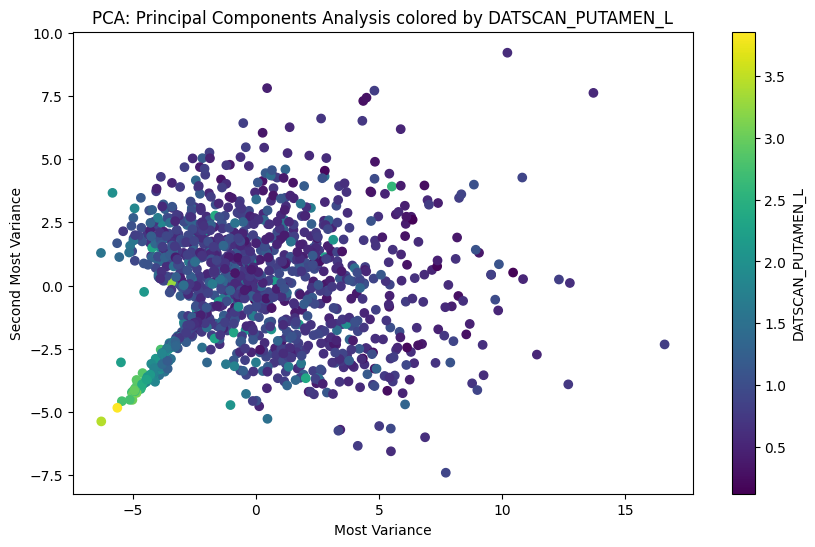

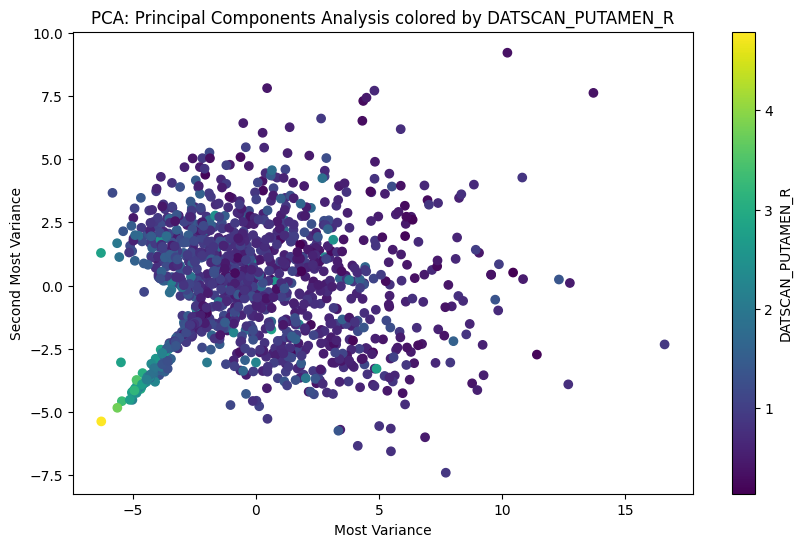

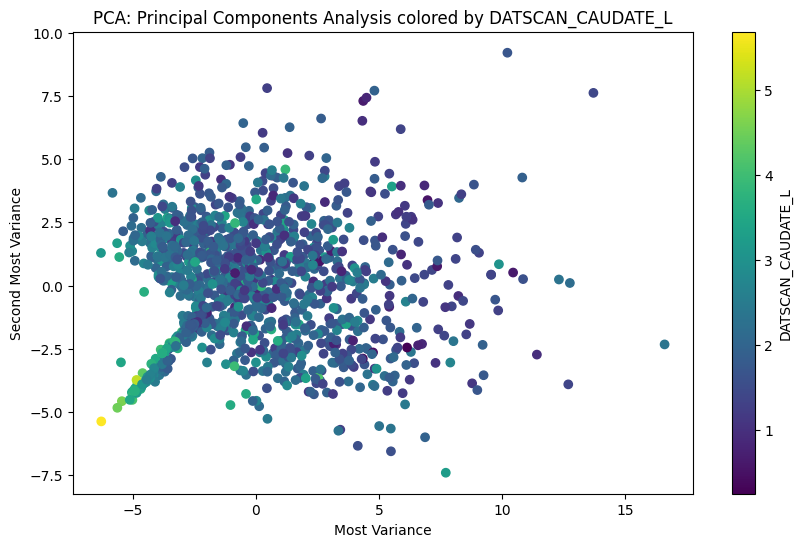

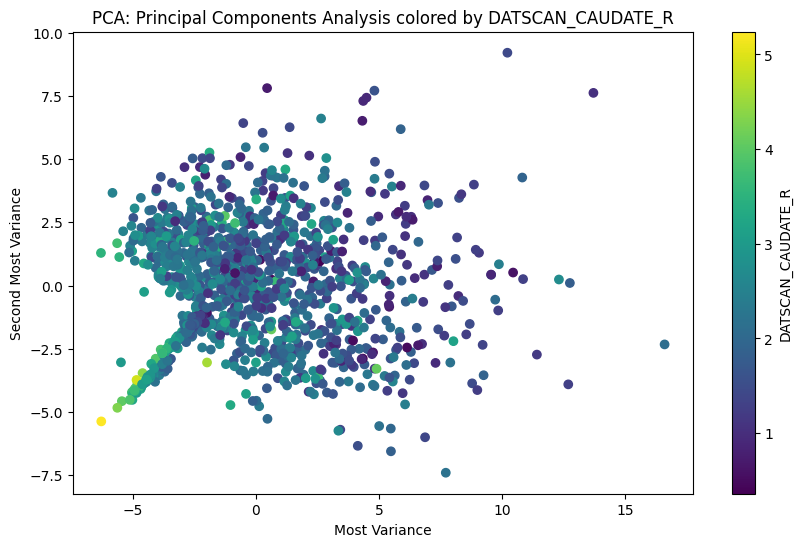

Top contributing variables to each principal component:

Principal Component 1:
NP2PTOT    0.223599
NP3TOT     0.199015
NP2RISE    0.191390
NP2DRES    0.182258
NP2HOBB    0.181621
NP1PTOT    0.181501
NP2WALK    0.170610
NP2TURN    0.162679
NP2EAT     0.154493
NP3SPCH    0.151128
Name: PC1, dtype: float64

Principal Component 2:
PDDXDT                       0.177288
SXDT                         0.176633
PDTRTMNT                     0.158201
NP1DPRS                      0.140203
GENETICS_LRRK2               0.135251
NP1RTOT                      0.134087
DATSCAN_VISINTRP_positive    0.133418
NP1ANXS                      0.115072
NP1COG                       0.101979
NP1APAT                      0.099871
Name: PC2, dtype: float64

Principal Component 3:
DATSCAN_PUTAMEN_L            0.257074
DATSCAN_VISINTRP_negative    0.252012
NP1FATG                      0.203509
NP1PTOT                      0.192380
DATSCAN_CAUDATE_L            0.185958
DATSCAN_PUTAMEN_R            0.176274
NP1PAIN     

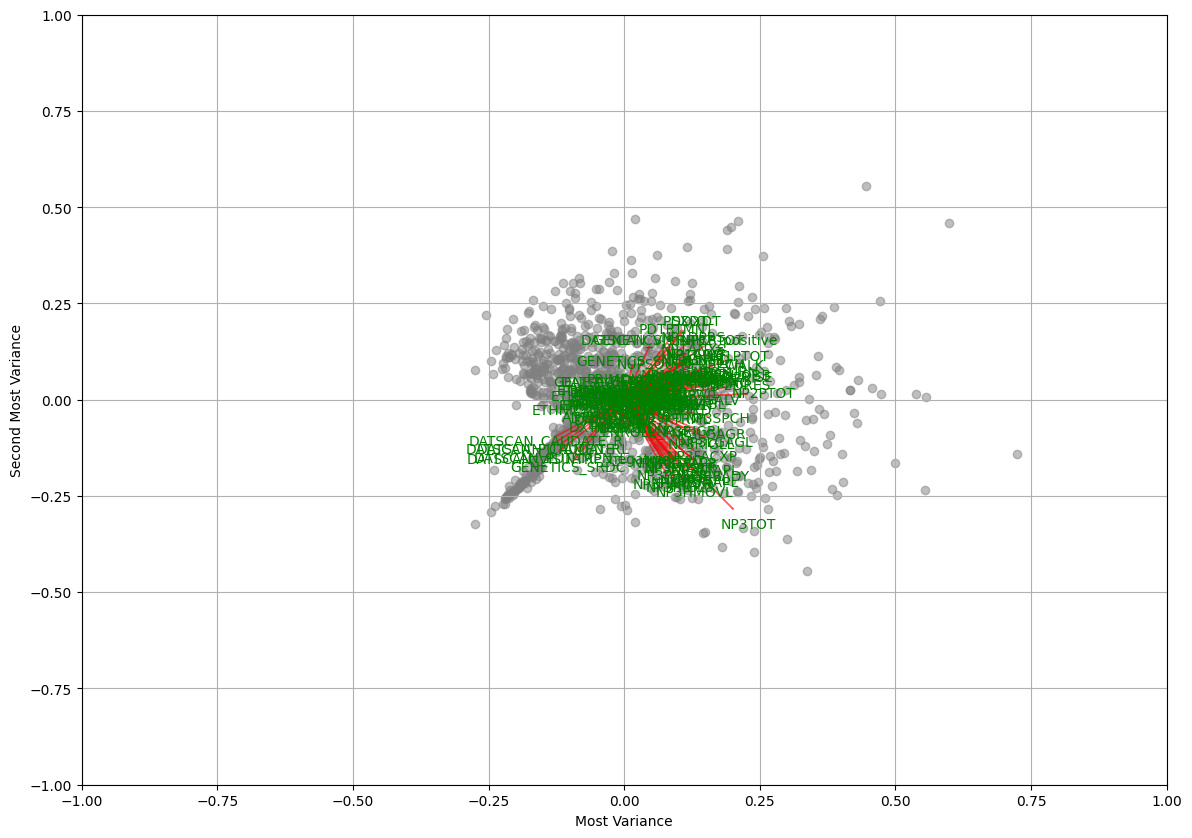

In [ ]:
# Convert categorical variables to numeric
updated_selected_df = pd.get_dummies(updated_selected_df, columns=['GENETICS', 'ETHNICITY', 'SEX', 'HANDED', 'PRIMDIAG', 'DATSCAN_VISINTRP'])

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(updated_selected_df)

# Apply PCA with 4 components
n_components = 4
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(x_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Explained variance for the chosen number of components
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Total explained variance: {sum(explained_variance)}')

# Principal components and their loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components + 1)], index=updated_selected_df.columns)
print(loadings)

# Combine the PCA results with the original data
final_df = pd.concat([pca_df, updated_selected_df.reset_index(drop=True)], axis=1)

# Create scatter plots for each of the dopamine variables
dopamine_vars = ['DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_CAUDATE_R']

for var in dopamine_vars:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(final_df['PC1'], final_df['PC2'], c=final_df[var], cmap='viridis')
    plt.title(f'PCA: Principal Components Analysis colored by {var}')
    plt.xlabel('Most Variance')
    plt.ylabel('Second Most Variance')
    cbar = plt.colorbar(scatter)
    cbar.set_label(var)
    plt.show()

# Analyze loadings to identify influential covariates for each principal component
print("Top contributing variables to each principal component:")
for i in range(1, n_components + 1):
    print(f"\nPrincipal Component {i}:")
    print(loadings[f'PC{i}'].sort_values(ascending=False).head(10))

# Biplot function
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray', alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel('Most Variance')
    plt.ylabel('Second Most Variance')
    plt.grid()

# Create biplot for the first two principal components
plt.figure(figsize=(14, 10))
biplot(principal_components, np.transpose(pca.components_[0:2, :]), labels=updated_selected_df.columns)
plt.show()


**MANOVA (Multivariate Analysis of Variance)**

a) Creating string formulas representing dependent and independent variables

b) Fitting the model

In [ ]:
from statsmodels.multivariate.manova import MANOVA
# MANOVA
# Combine the dependent and independent variables into a single DataFrame for MANOVA
encoded_covariate_columns = [col for col in updated_selected_df.columns if col not in dopamine_columns]

# Replace invalid characters in column names
manova_data = pd.concat([updated_selected_df[dopamine_columns], updated_selected_df[encoded_covariate_columns]], axis=1)
manova_data.columns = manova_data.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

# Construct the formula for MANOVA
dependent_formula = ' + '.join(dopamine_columns)
independent_formula = ' + '.join(manova_data.columns.difference(dopamine_columns))
formula = f'{dependent_formula} ~ {independent_formula}'

# Fit the MANOVA model
manova = MANOVA.from_formula(formula, data=manova_data)
manova_results = manova.mv_test()

# Print the results
print(manova_results)

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
          Intercept        Value  Num DF   Den DF  F Value Pr > F
-----------------------------------------------------------------
             Wilks' lambda 0.9982 4.0000 1111.0000  0.5141 0.7254
            Pillai's trace 0.0018 4.0000 1111.0000  0.5141 0.7254
    Hotelling-Lawley trace 0.0019 4.0000 1111.0000  0.5141 0.7254
       Roy's greatest root 0.0019 4.0000 1111.0000  0.5141 0.7254
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
 DATSCAN_VISINTRP_negative Value  Num DF   Den DF  F Value Pr > F
-----------------------------------------------------------------
             Wilks' lambda 0.9967 4.0000 1111.0000  0.9069 0.4591
            Pillai's trace 0.0

### Assessment of Caudate and Putamen Lateralization Using Statistical Methods and Regression Analysis

In [15]:
# Calculate lateralization indices
updated_selected_df['CAUDATE_LAT'] = (updated_selected_df['DATSCAN_CAUDATE_R'] - updated_selected_df['DATSCAN_CAUDATE_L']) / (updated_selected_df['DATSCAN_CAUDATE_R'] + updated_selected_df['DATSCAN_CAUDATE_L'])
updated_selected_df['PUTAMEN_LAT'] = (updated_selected_df['DATSCAN_PUTAMEN_R'] - updated_selected_df['DATSCAN_PUTAMEN_L']) / (updated_selected_df['DATSCAN_PUTAMEN_R'] + updated_selected_df['DATSCAN_PUTAMEN_L'])

# Ensure the lateralization indices are numeric
updated_selected_df[['CAUDATE_LAT', 'PUTAMEN_LAT']] = updated_selected_df[['CAUDATE_LAT', 'PUTAMEN_LAT']].apply(pd.to_numeric, errors='coerce')

# Descriptive statistics for caudate and putamen lateralization indices
caudate_lat_stats = updated_selected_df['CAUDATE_LAT'].describe()
putamen_lat_stats = updated_selected_df['PUTAMEN_LAT'].describe()

# Test if caudate and putamen lateralization indices are significantly different from zero
t_stat_caudate, p_val_caudate = ttest_1samp(updated_selected_df['CAUDATE_LAT'], 0)
t_stat_putamen, p_val_putamen = ttest_1samp(updated_selected_df['PUTAMEN_LAT'], 0)

# Define the independent variables (covariates)
covariates = ['ENROLL_AGE', 'EDUCYRS', 'NP3TOT', 'NHY', 'NP3BRADY', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL']
# Get one-hot encoded covariate columns
encoded_covariate_columns = [col for col in updated_selected_df.columns if any(cov in col for cov in covariates)]

# Extract the covariates
X = updated_selected_df[encoded_covariate_columns]

# Add a constant term to the model
X = sm.add_constant(X)

# Convert dependent variables to numeric type
y_caudate = updated_selected_df['CAUDATE_LAT'].astype(float)
y_putamen = updated_selected_df['PUTAMEN_LAT'].astype(float)

# Drop rows with any missing values in the dependent or independent variables
df_cleaned = pd.concat([y_caudate, y_putamen, X], axis=1).dropna()

# Separate the cleaned data into dependent and independent variables again
y_caudate = df_cleaned['CAUDATE_LAT']
y_putamen = df_cleaned['PUTAMEN_LAT']
X = df_cleaned.drop(columns=['CAUDATE_LAT', 'PUTAMEN_LAT'])

# Fit linear regression models
model_caudate = sm.OLS(y_caudate, X).fit()
model_putamen = sm.OLS(y_putamen, X).fit()

# Display the summary of the regression models
caudate_summary = model_caudate.summary()
putamen_summary = model_putamen.summary()

# Output the results
print("Descriptive Statistics for Caudate Lateralization:")
print(caudate_lat_stats)

print("\nDescriptive Statistics for Putamen Lateralization:")
print(putamen_lat_stats)

print("\nT-test for Caudate Lateralization Index being different from zero:")
print(f"T-statistic: {t_stat_caudate}, P-value: {p_val_caudate}")

print("\nT-test for Putamen Lateralization Index being different from zero:")
print(f"T-statistic: {t_stat_putamen}, P-value: {p_val_putamen}")

print("\nLinear Regression Model Summary for Caudate Lateralization:")
print(caudate_summary)

print("\nLinear Regression Model Summary for Putamen Lateralization:")
print(putamen_summary)


Descriptive Statistics for Caudate Lateralization:
count    1223.000000
mean        0.000554
std         0.111885
min        -0.423913
25%        -0.076543
50%         0.000000
75%         0.078580
max         0.369048
Name: CAUDATE_LAT, dtype: float64

Descriptive Statistics for Putamen Lateralization:
count    1223.000000
mean        0.013102
std         0.204885
min        -0.600000
25%        -0.138574
50%         0.010753
75%         0.162871
max         0.670330
Name: PUTAMEN_LAT, dtype: float64

T-test for Caudate Lateralization Index being different from zero:
T-statistic: 0.17319987580251195, P-value: 0.8625230048477819

T-test for Putamen Lateralization Index being different from zero:
T-statistic: 2.236401194943198, P-value: 0.02550538244085147

Linear Regression Model Summary for Caudate Lateralization:
                            OLS Regression Results                            
Dep. Variable:            CAUDATE_LAT   R-squared:                       0.382
Model:         

### Quantitative Analysis of Caudate and Putamen Lateralization Using Machine Learning Models

Machine Learning Models:
* Linear Regression
* Random Forest
* Support Vector Regressor (SVR)

Evaluation Metrics:
* Mean Squared Error (MSE)
* R-squared (R^2)

In [ ]:
# Calculate lateralization indices
updated_selected_df['CAUDATE_LAT'] = (updated_selected_df['DATSCAN_CAUDATE_R'] - updated_selected_df['DATSCAN_CAUDATE_L']) / (updated_selected_df['DATSCAN_CAUDATE_R'] + updated_selected_df['DATSCAN_CAUDATE_L'])
updated_selected_df['PUTAMEN_LAT'] = (updated_selected_df['DATSCAN_PUTAMEN_R'] - updated_selected_df['DATSCAN_PUTAMEN_L']) / (updated_selected_df['DATSCAN_PUTAMEN_R'] + updated_selected_df['DATSCAN_PUTAMEN_L'])

# Ensure the lateralization indices are numeric
updated_selected_df[['CAUDATE_LAT', 'PUTAMEN_LAT']] = updated_selected_df[['CAUDATE_LAT', 'PUTAMEN_LAT']].apply(pd.to_numeric, errors='coerce')

# Define the independent variables (covariates)
covariates = [
    'ENROLL_AGE', 'EDUCYRS', 'NP3TOT', 'NHY', 'NP3BRADY', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL',
    'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL'
]
# Get one-hot encoded covariate columns
encoded_covariate_columns = [col for col in updated_selected_df.columns if any(cov in col for cov in covariates)]

# Extract the covariates
X = updated_selected_df[encoded_covariate_columns]

# Convert dependent variables to numeric type
y_caudate = updated_selected_df['CAUDATE_LAT'].astype(float)
y_putamen = updated_selected_df['PUTAMEN_LAT'].astype(float)

# Drop rows with any missing values in the dependent or independent variables
df_cleaned = pd.concat([y_caudate, y_putamen, X], axis=1).dropna()

# Separate the cleaned data into dependent and independent variables again
y_caudate = df_cleaned['CAUDATE_LAT']
y_putamen = df_cleaned['PUTAMEN_LAT']
X = df_cleaned.drop(columns=['CAUDATE_LAT', 'PUTAMEN_LAT'])

# Split the data into training and testing sets
X_train, X_test, y_caudate_train, y_caudate_test, y_putamen_train, y_putamen_test = train_test_split(
    X, y_caudate, y_putamen, test_size=0.3, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model for Caudate Lateralization
lr_caudate = LinearRegression()
lr_caudate.fit(X_train_scaled, y_caudate_train)
y_caudate_pred_lr = lr_caudate.predict(X_test_scaled)

# Random Forest Regressor for Caudate Lateralization
rf_caudate = RandomForestRegressor(n_estimators=100, random_state=42)
rf_caudate.fit(X_train_scaled, y_caudate_train)
y_caudate_pred_rf = rf_caudate.predict(X_test_scaled)

# Support Vector Regressor for Caudate Lateralization
svr_caudate = SVR(kernel='linear')
svr_caudate.fit(X_train_scaled, y_caudate_train)
y_caudate_pred_svr = svr_caudate.predict(X_test_scaled)

# Linear Regression Model for Putamen Lateralization
lr_putamen = LinearRegression()
lr_putamen.fit(X_train_scaled, y_putamen_train)
y_putamen_pred_lr = lr_putamen.predict(X_test_scaled)

# Random Forest Regressor for Putamen Lateralization
rf_putamen = RandomForestRegressor(n_estimators=100, random_state=42)
rf_putamen.fit(X_train_scaled, y_putamen_train)
y_putamen_pred_rf = rf_putamen.predict(X_test_scaled)

# Support Vector Regressor for Putamen Lateralization
svr_putamen = SVR(kernel='linear')
svr_putamen.fit(X_train_scaled, y_putamen_train)
y_putamen_pred_svr = svr_putamen.predict(X_test_scaled)

# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

# Caudate Lateralization Evaluation
caudate_lr_mse, caudate_lr_r2 = evaluate_model(y_caudate_test, y_caudate_pred_lr)
caudate_rf_mse, caudate_rf_r2 = evaluate_model(y_caudate_test, y_caudate_pred_rf)
caudate_svr_mse, caudate_svr_r2 = evaluate_model(y_caudate_test, y_caudate_pred_svr)

# Putamen Lateralization Evaluation
putamen_lr_mse, putamen_lr_r2 = evaluate_model(y_putamen_test, y_putamen_pred_lr)
putamen_rf_mse, putamen_rf_r2 = evaluate_model(y_putamen_test, y_putamen_pred_rf)
putamen_svr_mse, putamen_svr_r2 = evaluate_model(y_putamen_test, y_putamen_pred_svr)

# Output the results
print("Caudate Lateralization Evaluation:")
print(f"Linear Regression - MSE: {caudate_lr_mse}, R2: {caudate_lr_r2}")
print(f"Random Forest - MSE: {caudate_rf_mse}, R2: {caudate_rf_r2}")
print(f"Support Vector Regressor - MSE: {caudate_svr_mse}, R2: {caudate_svr_r2}")

print("\nPutamen Lateralization Evaluation:")
print(f"Linear Regression - MSE: {putamen_lr_mse}, R2: {putamen_lr_r2}")
print(f"Random Forest - MSE: {putamen_rf_mse}, R2: {putamen_rf_r2}")
print(f"Support Vector Regressor - MSE: {putamen_svr_mse}, R2: {putamen_svr_r2}")

Caudate Lateralization Evaluation:
Linear Regression - MSE: 0.008221108670752103, R2: 0.3506188465211719
Random Forest - MSE: 0.008963782041175079, R2: 0.29195545825347236
Support Vector Regressor - MSE: 0.00829031788983664, R2: 0.34515204583522807

Putamen Lateralization Evaluation:
Linear Regression - MSE: 0.028990795011678533, R2: 0.3220145014398822
Random Forest - MSE: 0.03314273541121525, R2: 0.2249162541983757
Support Vector Regressor - MSE: 0.028886692413687635, R2: 0.3244490690939197


Machine Learning Models used below:
* Linear Regression
* Random Forest
* Support Vector Regressor (SVR)
* K-Nearest Neighbors (KNN)

Evaluation Metrics:
* Mean Squared Error (MSE)
* R-squared (R^2)

The two code cells below take approximately 45 mins each to run.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# File paths
patient_master_path = '/content/drive/MyDrive/PM_project/Data-20240506/Patient_Master.csv'
data_dictionary_path = '/content/drive/MyDrive/PM_project/Data-20240506/PPMI_data_dictionary_merge.csv'

# Load data
patient_master_df = pd.read_csv(patient_master_path)
data_dictionary_df = pd.read_csv(data_dictionary_path)

# Filter for PD patients
df = patient_master_df[patient_master_df['COHORT'] == 'PD']

# Select relevant columns
relevant_columns = [
    'PATNO', 'SEX', 'HANDED', 'ENROLL_AGE', 'EDUCYRS', 'NP3TOT', 'DATSCAN_CAUDATE_R',
    'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L', 'NHY', 'NP3BRADY',
    'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3FACXP',
    'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR',
    'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR'
]

df = df[relevant_columns].dropna()

# Use a smaller subset of data for faster computation
df = df.sample(frac=0.1, random_state=42)

# Ensure data is numeric
numeric_columns = [
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L',
    'ENROLL_AGE', 'EDUCYRS', 'NP3TOT', 'NHY', 'NP3BRADY', 'NP3RIGRU', 'NP3RIGLU',
    'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3FACXP', 'NP3HMOVR', 'NP3HMOVL',
    'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG',
    'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR'
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate lateralization indices
df['CAUDATE_LAT'] = (df['DATSCAN_CAUDATE_R'] - df['DATSCAN_CAUDATE_L']) / (df['DATSCAN_CAUDATE_R'] + df['DATSCAN_CAUDATE_L'])
df['PUTAMEN_LAT'] = (df['DATSCAN_PUTAMEN_R'] - df['DATSCAN_PUTAMEN_L']) / (df['DATSCAN_PUTAMEN_R'] + df['DATSCAN_PUTAMEN_L'])

# Feature Engineering
df['AGE_EDUCYRS_INTERACTION'] = df['ENROLL_AGE'] * df['EDUCYRS']

# Define features and target variables
X = df.drop(columns=['CAUDATE_LAT', 'PUTAMEN_LAT'])
y_caudate = df['CAUDATE_LAT']
y_putamen = df['PUTAMEN_LAT']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_caudate_train, y_caudate_test = train_test_split(
    X, y_caudate, test_size=0.2, random_state=42
)

X_train, X_test, y_putamen_train, y_putamen_test = train_test_split(
    X, y_putamen, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to perform cross-validation
def cross_validate_model(model, X, y, cv=5):
    mse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    return mse_scores.mean(), r2_scores.mean()

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),  # Reduced number of estimators
    'Support Vector Regressor': SVR(kernel='linear', C=0.1),  # Simplified kernel and reduced C
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=3)  # Fewer neighbors
}

# Evaluate models for Caudate Lateralization
caudate_results = {}
for name, model in models.items():
    model.fit(X_train, y_caudate_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_caudate_test, y_pred)
    r2 = r2_score(y_caudate_test, y_pred)
    mse_cv, r2_cv = cross_validate_model(model, X, y_caudate)
    caudate_results[name] = (mse, r2, mse_cv, r2_cv)

# Evaluate models for Putamen Lateralization
putamen_results = {}
for name, model in models.items():
    model.fit(X_train, y_putamen_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_putamen_test, y_pred)
    r2 = r2_score(y_putamen_test, y_pred)
    mse_cv, r2_cv = cross_validate_model(model, X, y_putamen)
    putamen_results[name] = (mse, r2, mse_cv, r2_cv)

# Output results
print("Caudate Lateralization Evaluation:")
for name, (mse, r2, mse_cv, r2_cv) in caudate_results.items():
    print(f"{name} - MSE: {mse}, R2: {r2}, CV MSE: {mse_cv}, CV R2: {r2_cv}")

print("\nPutamen Lateralization Evaluation:")
for name, (mse, r2, mse_cv, r2_cv) in putamen_results.items():
    print(f"{name} - MSE: {mse}, R2: {r2}, CV MSE: {mse_cv}, CV R2: {r2_cv}")


Caudate Lateralization Evaluation:
Linear Regression - MSE: 0.003702133197482233, R2: 0.6267652372490291, CV MSE: 0.002260276797368236, CV R2: 0.8305117457379506
Random Forest - MSE: 0.00829797287198836, R2: 0.16343044105035032, CV MSE: 0.007152577521439972, CV R2: 0.46065036196848563
Support Vector Regressor - MSE: 0.005650348741708976, R2: 0.43035367460408147, CV MSE: 2394.3414548849582, CV R2: -168703.18164181188
K-Nearest Neighbors - MSE: 0.004960788460548958, R2: 0.4998724774705705, CV MSE: 0.01816297647125311, CV R2: -0.34518506109980135

Putamen Lateralization Evaluation:
Linear Regression - MSE: 0.00931168515967878, R2: 0.7839639377625367, CV MSE: 0.0052309134270039515, CV R2: 0.8481374283602449
Random Forest - MSE: 0.010670488952713985, R2: 0.7524389650248651, CV MSE: 0.010448004816004396, CV R2: 0.7062081815847503
Support Vector Regressor - MSE: 0.015253808504355159, R2: 0.6461035068416233, CV MSE: 1173.4926297245254, CV R2: -39995.440601586546
K-Nearest Neighbors - MSE: 0.03

Machine Learning Models used below:
* Linear Regression
* Random Forest
* Support Vector Regressor (SVR)
* K-Nearest Neighbors (KNN)
* Gradient Boosting Regression

Evaluation Metrics:
* Mean Squared Error (MSE)
* R-squared (R^2)

In [16]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

start_time = time.time()

# File paths
patient_master_path = '/content/drive/MyDrive/PM_project/Data-20240506/Patient_Master.csv'
data_dictionary_path = '/content/drive/MyDrive/PM_project/Data-20240506/PPMI_data_dictionary_merge.csv'

# Load data
patient_master_df = pd.read_csv(patient_master_path)
data_dictionary_df = pd.read_csv(data_dictionary_path)

# Filter for PD patients
df = patient_master_df[patient_master_df['COHORT'] == 'PD']

# Select relevant columns
relevant_columns = [
    'PATNO', 'SEX', 'HANDED', 'ENROLL_AGE', 'EDUCYRS', 'NP3TOT', 'DATSCAN_CAUDATE_R',
    'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L', 'NHY', 'NP3BRADY',
    'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3FACXP',
    'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR',
    'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR'
]

df = df[relevant_columns].dropna()

# Use a smaller subset of data for faster computation
df = df.sample(frac=0.1, random_state=42)

# Ensure data is numeric
numeric_columns = [
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L',
    'ENROLL_AGE', 'EDUCYRS', 'NP3TOT', 'NHY', 'NP3BRADY', 'NP3RIGRU', 'NP3RIGLU',
    'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3FACXP', 'NP3HMOVR', 'NP3HMOVL',
    'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG',
    'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR'
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate lateralization indices
df['CAUDATE_LAT'] = (df['DATSCAN_CAUDATE_R'] - df['DATSCAN_CAUDATE_L']) / (df['DATSCAN_CAUDATE_R'] + df['DATSCAN_CAUDATE_L'])
df['PUTAMEN_LAT'] = (df['DATSCAN_PUTAMEN_R'] - df['DATSCAN_PUTAMEN_L']) / (df['DATSCAN_PUTAMEN_R'] + df['DATSCAN_PUTAMEN_L'])

# Feature Engineering
df['AGE_EDUCYRS_INTERACTION'] = df['ENROLL_AGE'] * df['EDUCYRS']

# Define features and target variables
X = df.drop(columns=['CAUDATE_LAT', 'PUTAMEN_LAT'])
y_caudate = df['CAUDATE_LAT']
y_putamen = df['PUTAMEN_LAT']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_caudate_train, y_caudate_test = train_test_split(
    X, y_caudate, test_size=0.2, random_state=42
)

X_train, X_test, y_putamen_train, y_putamen_test = train_test_split(
    X, y_putamen, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to perform cross-validation
def cross_validate_model(model, X, y, cv=5):
    mse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    return mse_scores.mean(), r2_scores.mean()

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),  # Reduced number of estimators
    'Support Vector Regressor': SVR(kernel='linear', C=0.1),  # Simplified kernel and reduced C
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=3),  # Fewer neighbors
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=50, random_state=42)  # Gradient Boosting Regressor
}

# Evaluate models for Caudate Lateralization
caudate_results = {}
for name, model in models.items():
    model.fit(X_train, y_caudate_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_caudate_test, y_pred)
    r2 = r2_score(y_caudate_test, y_pred)
    mse_cv, r2_cv = cross_validate_model(model, X, y_caudate)
    caudate_results[name] = (mse, r2, mse_cv, r2_cv)

# Evaluate models for Putamen Lateralization
putamen_results = {}
for name, model in models.items():
    model.fit(X_train, y_putamen_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_putamen_test, y_pred)
    r2 = r2_score(y_putamen_test, y_pred)
    mse_cv, r2_cv = cross_validate_model(model, X, y_putamen)
    putamen_results[name] = (mse, r2, mse_cv, r2_cv)

# Output results
print("Caudate Lateralization Evaluation:")
for name, (mse, r2, mse_cv, r2_cv) in caudate_results.items():
    print(f"{name} - MSE: {mse}, R2: {r2}, CV MSE: {mse_cv}, CV R2: {r2_cv}")

print("\nPutamen Lateralization Evaluation:")
for name, (mse, r2, mse_cv, r2_cv) in putamen_results.items():
    print(f"{name} - MSE: {mse}, R2: {r2}, CV MSE: {mse_cv}, CV R2: {r2_cv}")

end_time = time.time()
print(f"\nTotal Execution Time: {end_time - start_time} seconds")


Caudate Lateralization Evaluation:
Linear Regression - MSE: 0.003702133197482233, R2: 0.6267652372490291, CV MSE: 0.002260276797368236, CV R2: 0.8305117457379506
Random Forest - MSE: 0.00829797287198836, R2: 0.16343044105035032, CV MSE: 0.007152577521439972, CV R2: 0.46065036196848563
Support Vector Regressor - MSE: 0.005650348741708976, R2: 0.43035367460408147, CV MSE: 2394.3414548849582, CV R2: -168703.18164181188
K-Nearest Neighbors - MSE: 0.004960788460548958, R2: 0.4998724774705705, CV MSE: 0.01816297647125311, CV R2: -0.34518506109980135
Gradient Boosting - MSE: 0.006130477406580191, R2: 0.3819489579815082, CV MSE: 0.005432842943353819, CV R2: 0.5934228323175992

Putamen Lateralization Evaluation:
Linear Regression - MSE: 0.00931168515967878, R2: 0.7839639377625367, CV MSE: 0.0052309134270039515, CV R2: 0.8481374283602449
Random Forest - MSE: 0.010670488952713985, R2: 0.7524389650248651, CV MSE: 0.010448004816004396, CV R2: 0.7062081815847503
Support Vector Regressor - MSE: 0.015

### Optimization and Evaluation of the Machine Learning Models

Machine Learning Models used below:
* Ridge Regression
* Lasso Regression
* Random Forest Regression
* Gradient Boosting Regression
* Hist Gradient Boosting Regression

Hyperparameter Tuning with GridSearchCV

Model Training and Evaluation:
* Mean Squared Error (MSE)
* R-Squared (R2)
Cross-Validation
* Time Measurement Conclusion

In [17]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

start_time = time.time()

# Feature Engineering
updated_selected_df['CAUDATE_LAT'] = (updated_selected_df['DATSCAN_CAUDATE_R'] - updated_selected_df['DATSCAN_CAUDATE_L']) / (updated_selected_df['DATSCAN_CAUDATE_R'] + updated_selected_df['DATSCAN_CAUDATE_L'])
updated_selected_df['PUTAMEN_LAT'] = (updated_selected_df['DATSCAN_PUTAMEN_R'] - updated_selected_df['DATSCAN_PUTAMEN_L']) / (updated_selected_df['DATSCAN_PUTAMEN_R'] + updated_selected_df['DATSCAN_PUTAMEN_L'])
updated_selected_df['AGE_EDUCYRS_INTERACTION'] = updated_selected_df['ENROLL_AGE'] * updated_selected_df['EDUCYRS']

# Select relevant columns including cognitive assessments
relevant_columns = [
    'PATNO', 'SEX', 'HANDED', 'ENROLL_AGE', 'EDUCYRS', 'NP3TOT', 'DATSCAN_CAUDATE_R',
    'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L', 'NHY', 'NP3BRADY',
    'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL',
    'MCATOT', 'HVLT_IMTREC', 'HVLT_DLYREC', 'HVLT_REC', 'LNS', 'SDMT', 'SEMFLU'
]

# Adjust relevant_columns to only include existing columns in the dataset
relevant_columns = [col for col in relevant_columns if col in updated_selected_df.columns]

df = updated_selected_df[relevant_columns].copy()

# Drop rows with missing values in key columns
df = df.dropna(subset=['DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L'])

# Ensure data is numeric
numeric_columns = [
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L',
    'ENROLL_AGE', 'EDUCYRS', 'NP3TOT', 'NHY', 'NP3BRADY', 'NP3RIGRU', 'NP3RIGLU',
    'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'MCATOT'
]

# Adjust numeric_columns to only include existing columns in the dataset
numeric_columns = [col for col in numeric_columns if col in df.columns]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Calculate lateralization indices
df['CAUDATE_LAT'] = (df['DATSCAN_CAUDATE_R'] - df['DATSCAN_CAUDATE_L']) / (df['DATSCAN_CAUDATE_R'] + df['DATSCAN_CAUDATE_L'])
df['PUTAMEN_LAT'] = (df['DATSCAN_PUTAMEN_R'] - df['DATSCAN_PUTAMEN_L']) / (df['DATSCAN_PUTAMEN_R'] + df['DATSCAN_PUTAMEN_L'])

# Ensure the lateralization indices are numeric
df[['CAUDATE_LAT', 'PUTAMEN_LAT']] = df[['CAUDATE_LAT', 'PUTAMEN_LAT']].apply(pd.to_numeric, errors='coerce')

# Define the independent variables (covariates)
covariates = ['SEX', 'HANDED', 'ENROLL_AGE', 'EDUCYRS', 'NP3TOT', 'NHY', 'NP3BRADY',
              'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'MCATOT']

# Adjust covariates to only include existing columns in the dataset
covariates = [col for col in covariates if col in df.columns]

X = df[covariates]

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert dependent variables to numeric type
y_caudate = df['CAUDATE_LAT'].astype(float)
y_putamen = df['PUTAMEN_LAT'].astype(float)

# Train-test split
X_train_caudate, X_test_caudate, y_train_caudate, y_test_caudate = train_test_split(X_scaled, y_caudate, test_size=0.2, random_state=42)
X_train_putamen, X_test_putamen, y_train_putamen, y_test_putamen = train_test_split(X_scaled, y_putamen, test_size=0.2, random_state=42)

# Define models
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=42)
}

# Hyperparameter tuning for Random Forest and Gradient Boosting
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100],  # Reduced number of estimators for faster computation
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],  # Reduced number of estimators for faster computation
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Training and validation
results = {}
for name, model in models.items():
    print(f"Training {name} model...")
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)  # Reduced CV folds
        grid_search.fit(X_train_caudate, y_train_caudate)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_caudate, y_train_caudate)

    # Predict and evaluate
    y_pred_train = best_model.predict(X_train_caudate)
    y_pred_test = best_model.predict(X_test_caudate)

    mse_train = mean_squared_error(y_train_caudate, y_pred_train)
    mse_test = mean_squared_error(y_test_caudate, y_pred_test)
    r2_train = r2_score(y_train_caudate, y_pred_train)
    r2_test = r2_score(y_test_caudate, y_pred_test)

    cv_mse = -cross_val_score(best_model, X_train_caudate, y_train_caudate, cv=3, scoring='neg_mean_squared_error').mean()  # Reduced CV folds
    cv_r2 = cross_val_score(best_model, X_train_caudate, y_train_caudate, cv=3, scoring='r2').mean()  # Reduced CV folds

    results[name] = {
        'MSE Train': mse_train,
        'MSE Test': mse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'CV MSE': cv_mse,
        'CV R2': cv_r2
    }

# Print results
for name, result in results.items():
    print(f"{name} Results:")
    print(f"Train MSE: {result['MSE Train']}, Test MSE: {result['MSE Test']}")
    print(f"Train R2: {result['R2 Train']}, Test R2: {result['R2 Test']}")
    print(f"Cross-Validation MSE: {result['CV MSE']}, Cross-Validation R2: {result['CV R2']}\n")

end_time = time.time()
print(f"\nTotal Execution Time: {end_time - start_time} seconds")

Training Ridge Regression model...
Training Lasso Regression model...
Training Random Forest model...
Training Gradient Boosting model...
Training Hist Gradient Boosting model...
Ridge Regression Results:
Train MSE: 0.007777475595231601, Test MSE: 0.007586127928238296
Train R2: 0.38804837673082704, Test R2: 0.3445854745166782
Cross-Validation MSE: 0.008176456428942866, Cross-Validation R2: 0.3562670611448618

Lasso Regression Results:
Train MSE: 0.012709298087457807, Test MSE: 0.011737664774955123
Train R2: 0.0, Test R2: -0.014092572855681329
Cross-Validation MSE: 0.012719934249741759, Cross-Validation R2: -0.0015325442443572996

Random Forest Results:
Train MSE: 0.0032829607465493437, Test MSE: 0.007828027226670862
Train R2: 0.7416882723217313, Test R2: 0.32368623377137373
Cross-Validation MSE: 0.008528270687894315, Cross-Validation R2: 0.3281909954704291

Gradient Boosting Results:
Train MSE: 0.006311883318181595, Test MSE: 0.007689557312715709
Train R2: 0.5033649163984526, Test R2: 

**Comparison and visualization of caudate and putamen lateralization in Healthy Cohorts and PD Cohorts**

Descriptive Statistics for Caudate Lateralization (HC):
count    256.000000
mean      -0.003937
std        0.048210
min       -0.145749
25%       -0.034678
50%       -0.005561
75%        0.025219
max        0.144681
Name: CAUDATE_LAT, dtype: float64

Descriptive Statistics for Caudate Lateralization (PD):
count    1223.000000
mean        0.000554
std         0.111885
min        -0.423913
25%        -0.076543
50%         0.000000
75%         0.078580
max         0.369048
Name: CAUDATE_LAT, dtype: float64

T-test for Caudate Lateralization between HC and PD:
T-statistic: -0.6300443617869335, P-value: 0.5287630151461109

Descriptive Statistics for Putamen Lateralization (HC):
count    256.000000
mean      -0.005173
std        0.072475
min       -0.246637
25%       -0.048134
50%       -0.005402
75%        0.040652
max        0.273312
Name: PUTAMEN_LAT, dtype: float64

Descriptive Statistics for Putamen Lateralization (PD):
count    1223.000000
mean        0.013102
std         0.204885
min 

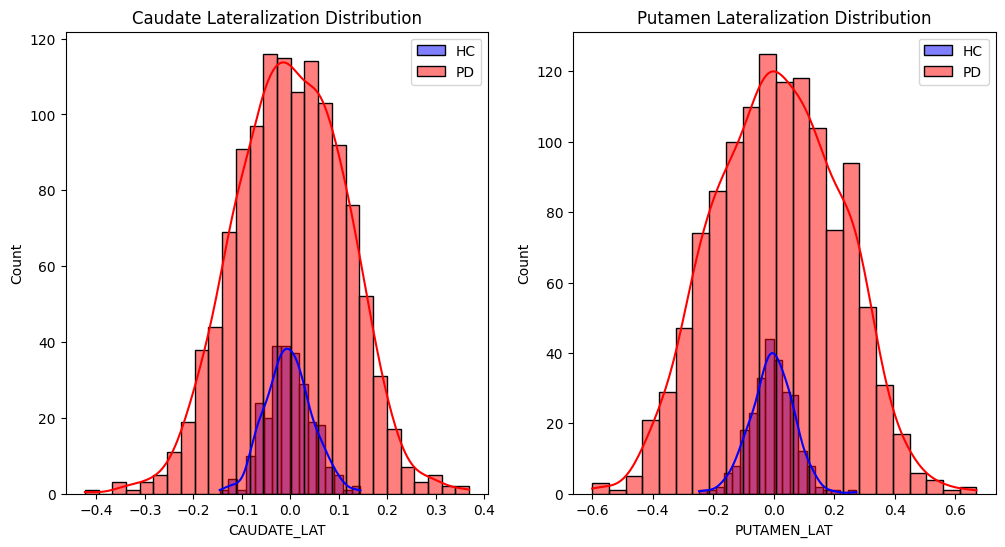

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
patient_master_path = '/content/drive/My Drive/Patient_Master.csv'

# Load data
patient_master_df = pd.read_csv(patient_master_path)

# Select relevant columns
relevant_columns = [
    'PATNO', 'COHORT', 'SEX', 'HANDED', 'ENROLL_AGE', 'EDUCYRS', 'NP3TOT',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L',
    'NHY', 'NP3BRADY', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL'
]
df = patient_master_df[relevant_columns].copy()

# Drop rows with missing values in key columns
df = df.dropna(subset=['DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L'])

# Ensure data is numeric
numeric_columns = [
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L',
    'ENROLL_AGE', 'EDUCYRS', 'NP3TOT', 'NHY', 'NP3BRADY', 'NP3RIGRU', 'NP3RIGLU',
    'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL'
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate lateralization indices
df['CAUDATE_LAT'] = (df['DATSCAN_CAUDATE_R'] - df['DATSCAN_CAUDATE_L']) / (df['DATSCAN_CAUDATE_R'] + df['DATSCAN_CAUDATE_L'])
df['PUTAMEN_LAT'] = (df['DATSCAN_PUTAMEN_R'] - df['DATSCAN_PUTAMEN_L']) / (df['DATSCAN_PUTAMEN_R'] + df['DATSCAN_PUTAMEN_L'])

# Filter for HC and PD groups
hc_df = df[df['COHORT'] == 'HC']
pd_df = df[df['COHORT'] == 'PD']

# Descriptive statistics
hc_caudate_stats = hc_df['CAUDATE_LAT'].describe()
pd_caudate_stats = pd_df['CAUDATE_LAT'].describe()

hc_putamen_stats = hc_df['PUTAMEN_LAT'].describe()
pd_putamen_stats = pd_df['PUTAMEN_LAT'].describe()

# T-tests
t_stat_caudate, p_val_caudate = ttest_ind(hc_df['CAUDATE_LAT'], pd_df['CAUDATE_LAT'])
t_stat_putamen, p_val_putamen = ttest_ind(hc_df['PUTAMEN_LAT'], pd_df['PUTAMEN_LAT'])

# Print results
print("Descriptive Statistics for Caudate Lateralization (HC):")
print(hc_caudate_stats)

print("\nDescriptive Statistics for Caudate Lateralization (PD):")
print(pd_caudate_stats)

print("\nT-test for Caudate Lateralization between HC and PD:")
print(f"T-statistic: {t_stat_caudate}, P-value: {p_val_caudate}")

print("\nDescriptive Statistics for Putamen Lateralization (HC):")
print(hc_putamen_stats)

print("\nDescriptive Statistics for Putamen Lateralization (PD):")
print(pd_putamen_stats)

print("\nT-test for Putamen Lateralization between HC and PD:")
print(f"T-statistic: {t_stat_putamen}, P-value: {p_val_putamen}")

# Visualizations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(hc_df['CAUDATE_LAT'], color='blue', label='HC', kde=True)
sns.histplot(pd_df['CAUDATE_LAT'], color='red', label='PD', kde=True)
plt.title('Caudate Lateralization Distribution')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(hc_df['PUTAMEN_LAT'], color='blue', label='HC', kde=True)
sns.histplot(pd_df['PUTAMEN_LAT'], color='red', label='PD', kde=True)
plt.title('Putamen Lateralization Distribution')
plt.legend()

plt.show()

Columns in dataset: Index(['Unnamed: 0', 'PATNO', 'COHORT', 'ENROLL_AGE', 'GENETICS', 'BIRTHDT',
       'ETHNICITY', 'SEX', 'HANDED', 'EVENT_ID',
       ...
       'AV133_TOTAL_DOSE_CALC', 'AV133_SCANNER', 'AV133_EMISS_SCAN_START_TIME',
       'AV133_SCAN_QUALITY_RATING', 'HTCM', 'WGTKG', 'STARTDT', 'LDOPA',
       'LEDD', 'MCATOT'],
      dtype='object', length=158)


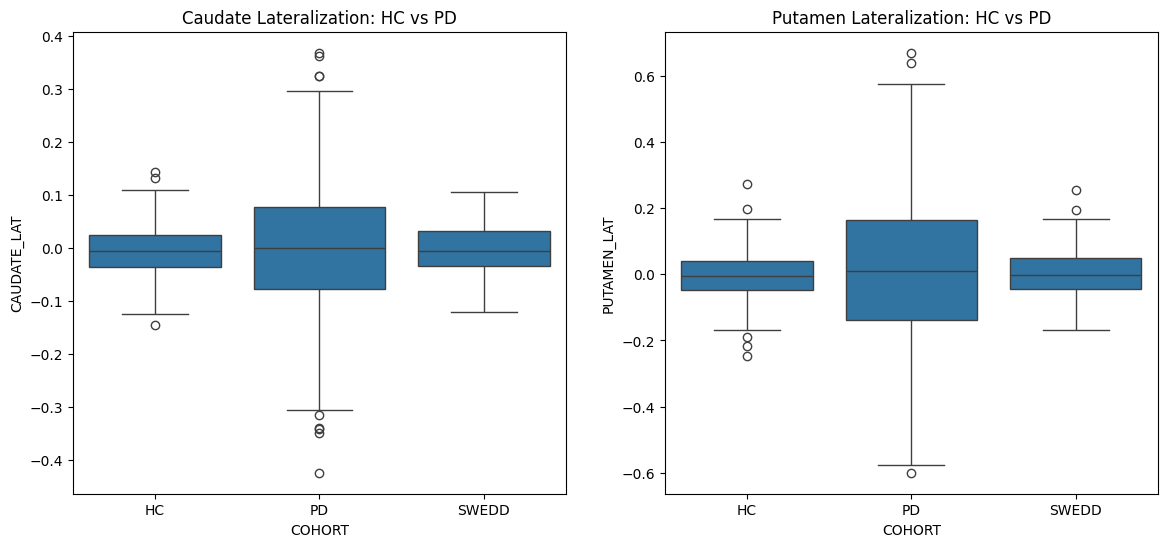

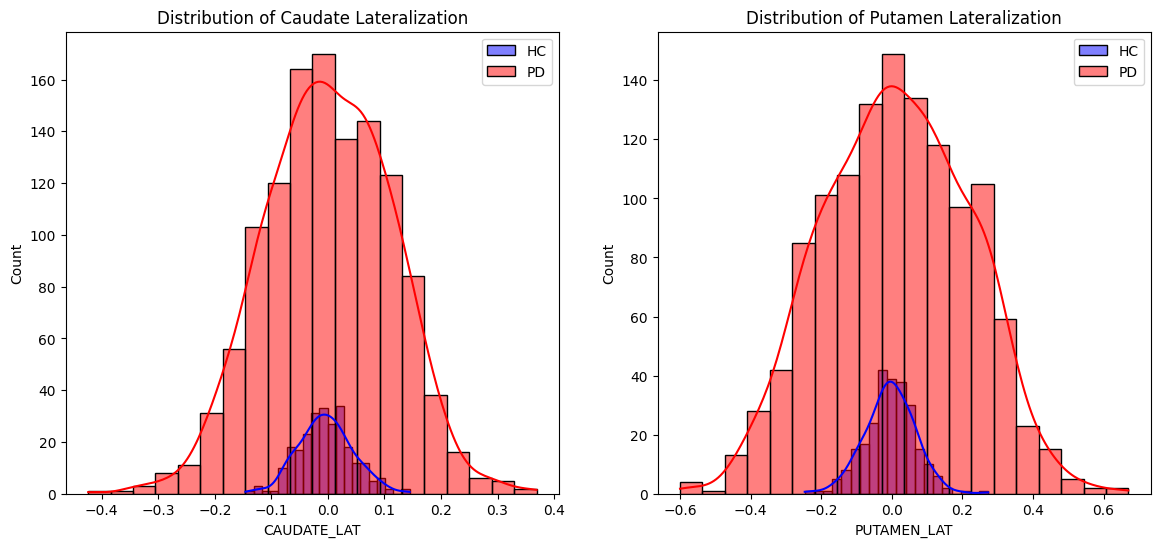

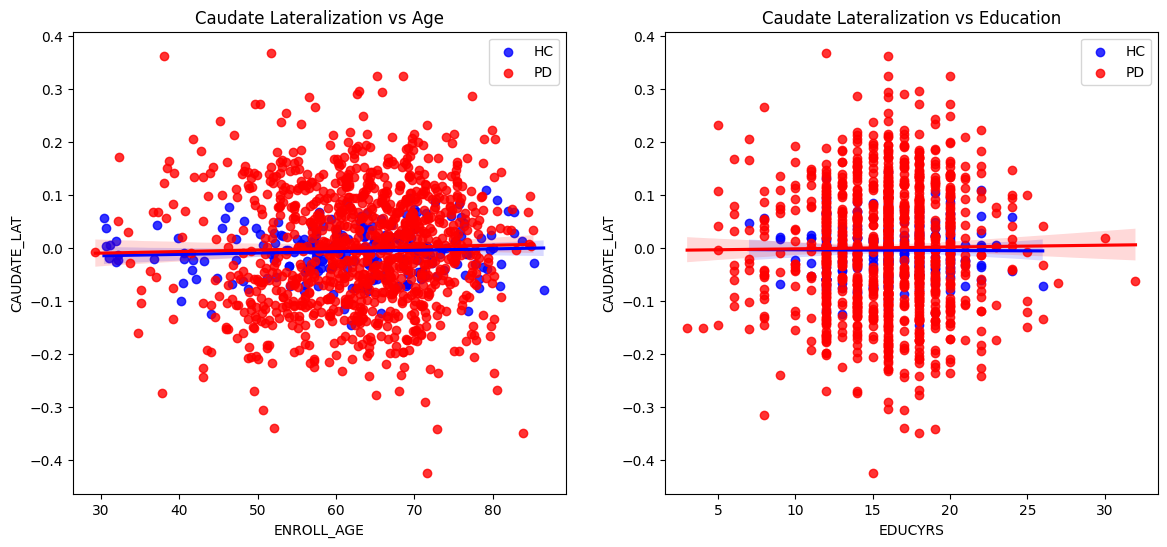

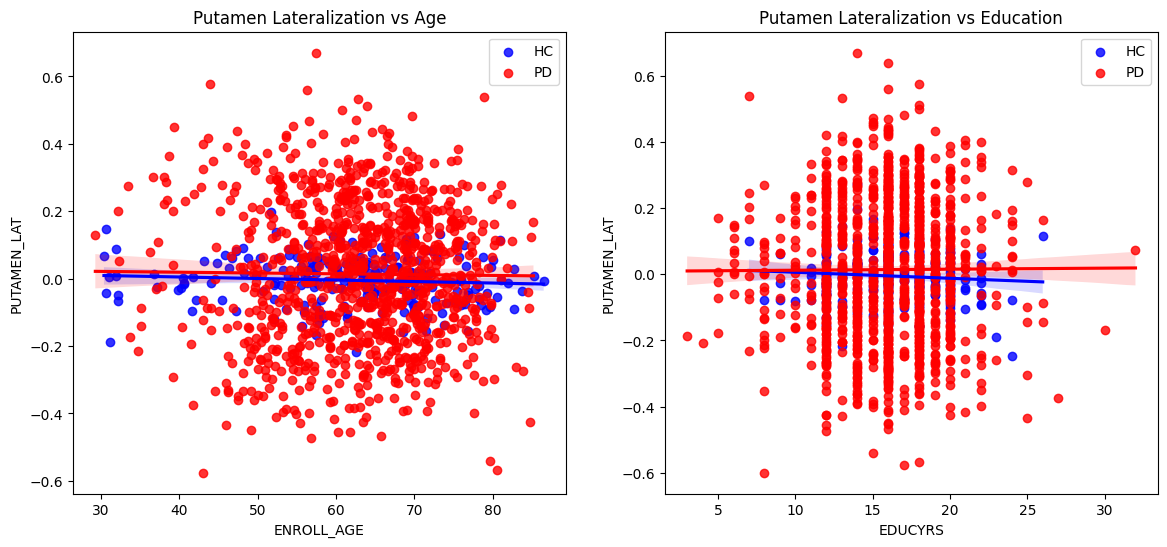

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (adjust the path if needed)
df = pd.read_csv('/content/drive/My Drive/Patient_Master.csv')

# Print the column names to verify
print("Columns in dataset:", df.columns)

# Calculate lateralization indices
df['CAUDATE_LAT'] = (df['DATSCAN_CAUDATE_R'] - df['DATSCAN_CAUDATE_L']) / (df['DATSCAN_CAUDATE_R'] + df['DATSCAN_CAUDATE_L'])
df['PUTAMEN_LAT'] = (df['DATSCAN_PUTAMEN_R'] - df['DATSCAN_PUTAMEN_L']) / (df['DATSCAN_PUTAMEN_R'] + df['DATSCAN_PUTAMEN_L'])

# Check for the presence of 'COHORT' column
if 'COHORT' in df.columns:
    # Separate data for HC and PD
    df_hc = df[df['COHORT'] == 'HC']
    df_pd = df[df['COHORT'] == 'PD']

    # Boxplots for Caudate and Putamen Lateralization
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='COHORT', y='CAUDATE_LAT', data=df)
    plt.title('Caudate Lateralization: HC vs PD')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='COHORT', y='PUTAMEN_LAT', data=df)
    plt.title('Putamen Lateralization: HC vs PD')

    plt.show()

    # Histograms for Caudate and Putamen Lateralization
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df_hc['CAUDATE_LAT'], color='blue', label='HC', kde=True, bins=20)
    sns.histplot(df_pd['CAUDATE_LAT'], color='red', label='PD', kde=True, bins=20)
    plt.legend()
    plt.title('Distribution of Caudate Lateralization')

    plt.subplot(1, 2, 2)
    sns.histplot(df_hc['PUTAMEN_LAT'], color='blue', label='HC', kde=True, bins=20)
    sns.histplot(df_pd['PUTAMEN_LAT'], color='red', label='PD', kde=True, bins=20)
    plt.legend()
    plt.title('Distribution of Putamen Lateralization')

    plt.show()

    # Scatter Plots with Regression Lines for Caudate Lateralization
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.regplot(x='ENROLL_AGE', y='CAUDATE_LAT', data=df_hc, color='blue', label='HC')
    sns.regplot(x='ENROLL_AGE', y='CAUDATE_LAT', data=df_pd, color='red', label='PD')
    plt.legend()
    plt.title('Caudate Lateralization vs Age')

    plt.subplot(1, 2, 2)
    sns.regplot(x='EDUCYRS', y='CAUDATE_LAT', data=df_hc, color='blue', label='HC')
    sns.regplot(x='EDUCYRS', y='CAUDATE_LAT', data=df_pd, color='red', label='PD')
    plt.legend()
    plt.title('Caudate Lateralization vs Education')

    plt.show()

    # Scatter Plots with Regression Lines for Putamen Lateralization
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.regplot(x='ENROLL_AGE', y='PUTAMEN_LAT', data=df_hc, color='blue', label='HC')
    sns.regplot(x='ENROLL_AGE', y='PUTAMEN_LAT', data=df_pd, color='red', label='PD')
    plt.legend()
    plt.title('Putamen Lateralization vs Age')

    plt.subplot(1, 2, 2)
    sns.regplot(x='EDUCYRS', y='PUTAMEN_LAT', data=df_hc, color='blue', label='HC')
    sns.regplot(x='EDUCYRS', y='PUTAMEN_LAT', data=df_pd, color='red', label='PD')
    plt.legend()
    plt.title('Putamen Lateralization vs Education')

    plt.show()


else:
    print("'COHORT' column not found. Please check the column names and ensure 'COHORT' is present.")